# Notes

# Load Modules

In [1]:
library(dplyr)
library(tidyr)
library(scater)
library(Seurat)
library(cowplot)
library(harmony)
library(destiny)
library(monocle3)
library(TSCAN)
library(uwot)
library(slingshot)
library(mclust)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, 

# Load Data

In [ ]:
sim_data = readRDS("simulation_data_branch_disconnected_with_noise.rds")

In [ ]:
additional_meta_info = read.csv("simulation_disconnected_ontrac_input.csv", row.names=1)
head(additional_meta_info)

,x,y,Niche_NTScore,Cell_NTScore,Ground_Truth,Cell_Type,Lineage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
cell1,-0.400000000,0.93397740,0.3254384318,0.41038990,0.400000000,A,1
cell2,0.400000000,-0.97018565,0.3651293818,0.44172327,0.400000000,A,1
cell3,-0.405309735,-0.82975244,0.5473044842,0.49076736,0.405309735,A,1
cell4,0.000000000,-0.02347488,0.0004455006,0.06888238,0.000000000,D,2
cell5,0.405357143,-0.98190729,0.3458631162,0.44803487,0.405357143,A,1
cell6,0.001769912,0.82813316,0.0304682154,0.13516030,0.001769912,D,2


In [4]:
sim_data@colData$Cell_Type = additional_meta_info$Cell_Type
sim_data@colData$x = additional_meta_info$x
sim_data@colData$y = additional_meta_info$y
sim_data@colData$lineage = additional_meta_info$Lineage
sim_data@colData$r = additional_meta_info$Ground_Truth
sim_data@colData$Cell_NTScore = additional_meta_info$Cell_NTScore

In [5]:
head(sim_data@colData)

DataFrame with 6 rows and 9 columns
        step_ix simulation_i  sim_time   Cell_Type           x          y
      <integer>    <integer> <numeric> <character>   <numeric>  <numeric>
cell1       646            5  595.6828           A -0.40000000  0.9339774
cell2      2002           15  759.5776           A  0.40000000 -0.9701857
cell3      2932           22  682.1247           A -0.40530973 -0.8297524
cell4      2610           20  140.9616           D  0.00000000 -0.0234749
cell5      2535           19  728.0022           A  0.40535714 -0.9819073
cell6      1265           10   90.2963           D  0.00176991  0.8281332
        lineage          r Cell_NTScore
      <integer>  <numeric>    <numeric>
cell1         1 0.40000000    0.4103899
cell2         1 0.40000000    0.4417233
cell3         1 0.40530973    0.4907674
cell4         2 0.00000000    0.0688824
cell5         1 0.40535714    0.4480349
cell6         2 0.00176991    0.1351603

## raw data output

In [6]:
write.csv(sim_data@assays@data@listData$counts, "simulated_expression.csv")

# seurat obj

In [6]:
ss0 <- CreateSeuratObject(counts = sim_data@assays@data@listData$counts)


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [7]:
ss0@meta.data$sim_time <- sim_data@colData$sim_time
ss0@meta.data$Cell_Type <- sim_data@colData$Cell_Type
ss0@meta.data$x <- sim_data@colData$x
ss0@meta.data$y <- sim_data@colData$y
ss0@meta.data$lineage <- sim_data@colData$lineage
ss0@meta.data$r <- sim_data@colData$r
ss0@meta.data$Cell_NTScore <- sim_data@colData$Cell_NTScore

In [8]:
# ss0 <- NormalizeData(ss0)
ss0 <- FindVariableFeatures(ss0)
ss0 <- ScaleData(ss0)

Centering and scaling data matrix



In [9]:
ss0 <- RunPCA(ss0)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  A7-TF1, A5-TF1, A7-TF2, B3-TF5, B4-TF1, right-M3-TF3, right-M3-TF2, right-M3-TF1, B3-TF4, B3-TF2 
	   right-M1-TF3, right-M2-TF1, right-M1-TF1, B3-TF1, right-M1-TF2, right-M5-TF1, B3-TF3, B3-TF6, right-M4-TF1, right-M5-TF2 
	   right-M5-TF3, B5-TF2, B5-TF1, B5-TF3, B9-TF1, B7-TF1, B9-TF2, B8-TF1, B9-TF3, left-D1-TF1 
Negative:  left-E1-TF4, left-E1-TF2, left-E1-TF5, left-C4-TF2, left-F1-TF6, left-E1-TF7, left-F1-TF7, left-F1-TF4, left-F1-TF10, left-F1-TF2 
	   left-E1-TF3, left-D4-TF3, left-E1-TF6, left-E1-TF1, left-D4-TF2, left-F1-TF3, left-F1-TF1, left-C4-TF1, left-D4-TF4, left-F1-TF9 
	   left-F1-TF8, left-D4-TF1, left-F1-TF5, left-F2-TF2, left-F2-TF1, left-D4-TF5, left-B2-TF1, B1-TF1, left-B1-TF2, left-A1-TF3 
PC_ 2 
Positive:  A6-TF1, left-B1-TF3, A4-TF1, left-A1-TF2, left-B1-TF1, left-A1-TF1, left-A1-TF4, A6

In [10]:
ss0 <- FindNeighbors(ss0, dims = 1:30, reduction = "pca")
ss0 <- FindClusters(ss0, resolution = 2, cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN

Warning message:
“The following arguments are not used: cluster.name”
Warning message:
“The following arguments are not used: cluster.name”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 454
Number of edges: 10005

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7209
Number of communities: 12
Elapsed time: 0 seconds


In [11]:
ss0 <- RunUMAP(ss0, dims = 1:30, reduction = "pca", reduction.name = "umap")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:48:12 UMAP embedding parameters a = 0.9922 b = 1.112

12:48:12 Read 454 rows and found 30 numeric columns

12:48:12 Using Annoy for neighbor search, n_neighbors = 30

12:48:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:48:12 Writing NN index file to temp file /tmp/RtmpqtyRCS/file2d5c4e694c4ef6

12:48:12 Searching Annoy index using 1 thread, search_k = 3000

12:48:12 Annoy recall = 100%

12:48:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [12]:
head(ss0@reductions$umap@cell.embeddings)

,UMAP_1,UMAP_2
cell1,10.426259,1.489621
cell2,10.883916,6.274690
cell3,3.153790,6.533406
cell4,-5.897790,-26.422253
cell5,8.511364,8.091074
cell6,4.854162,-10.189696


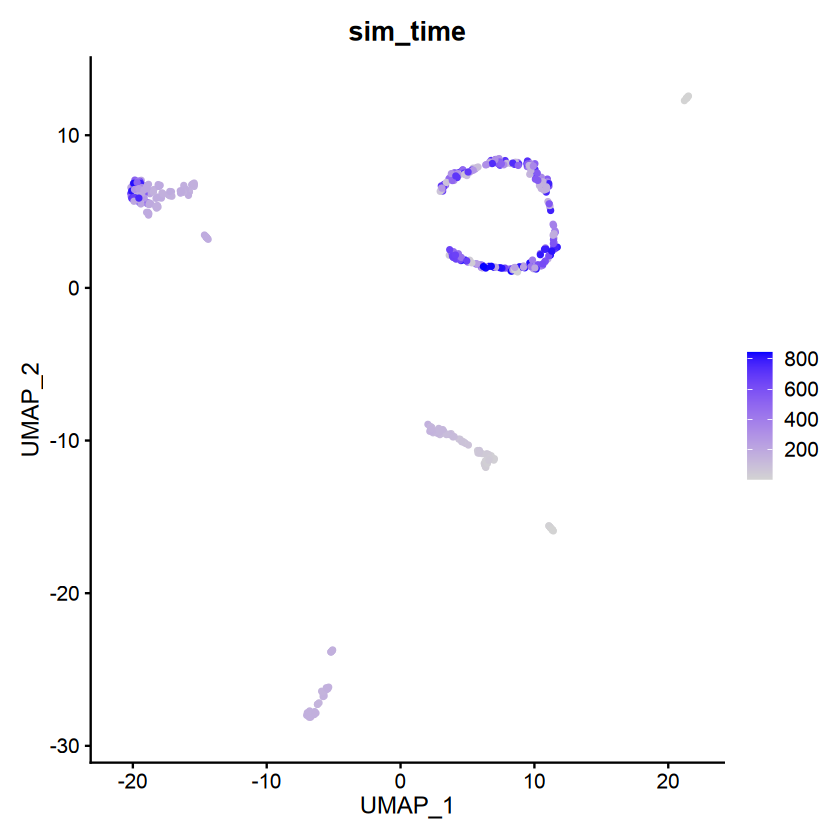

In [13]:
FeaturePlot(ss0, features = c("sim_time"), reduction = "umap")

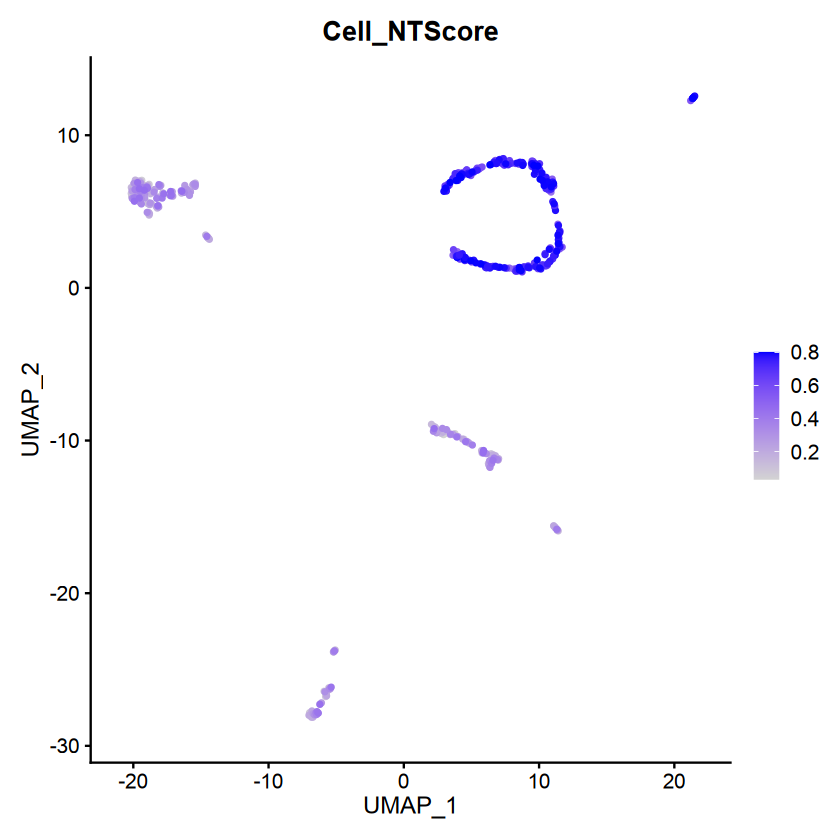

In [14]:
FeaturePlot(ss0, features = c("Cell_NTScore"), reduction = "umap")

In [15]:
root.use <- rownames(ss0@meta.data[ss0@meta.data$sim_time==min(ss0@meta.data$sim_time),])


In [16]:
ss0@meta.data$sim_time_rank <- rank(ss0@meta.data$sim_time,ties.method = 'random', na.last = 'keep')
ss0@meta.data$sim_time_norm <- scales::rescale(ss0@meta.data$sim_time_rank,to = c(0,1))


# DPT

In [17]:
dm.use <- DiffusionMap(data = sim_data)

Warning message in (function (data, k, ..., query = NULL, distance = c("euclidean", :
“find_knn does not yet support sparse matrices, converting data to a dense matrix.”
Warning message:
“'as(<dsCMatrix>, "dsTMatrix")' is deprecated.
Use 'as(., "TsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").”


In [18]:
ss0[['dmap']] <- CreateDimReducObject(embeddings = dm.use@eigenvectors,assay = 'RNA',stdev = dm.use@eigenvalues,key = 'DC_')


In [19]:
dpt.use <- DPT(dm.use,tips = match(root.use,rownames(dm.use@eigenvectors)))
dpt_rank <- rank(dpt.use$dpt,ties.method = 'random', na.last = 'keep')
ss0@meta.data$dpt_norm <- scales::rescale(dpt_rank,to = c(0,1))
ss0@meta.data$dpt = dpt.use$dpt


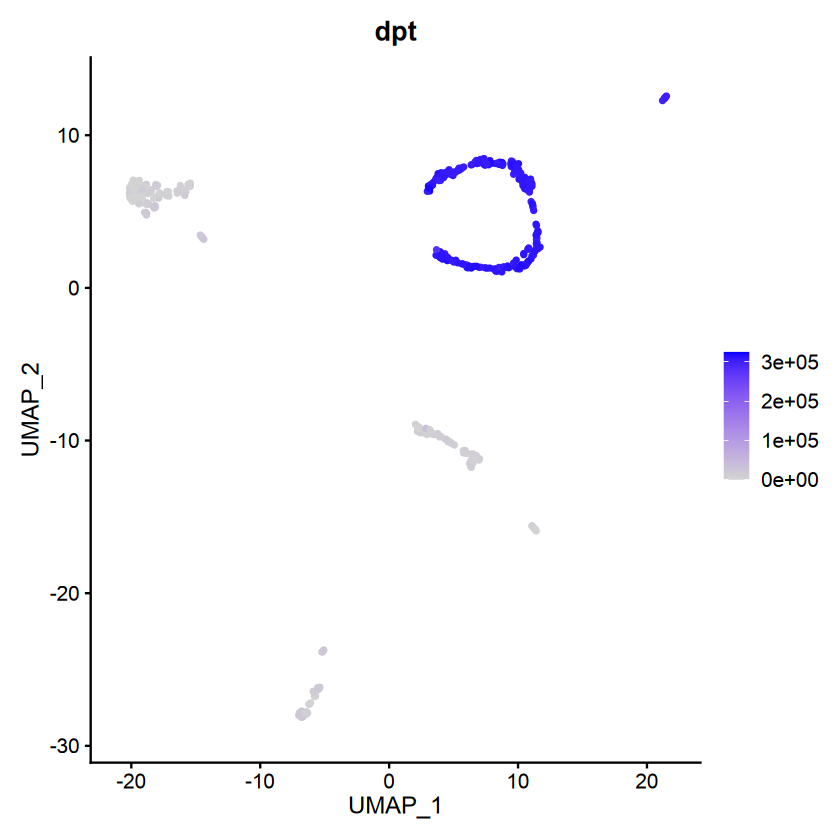

In [20]:
FeaturePlot(ss0, features = c("dpt"), reduction = "umap")


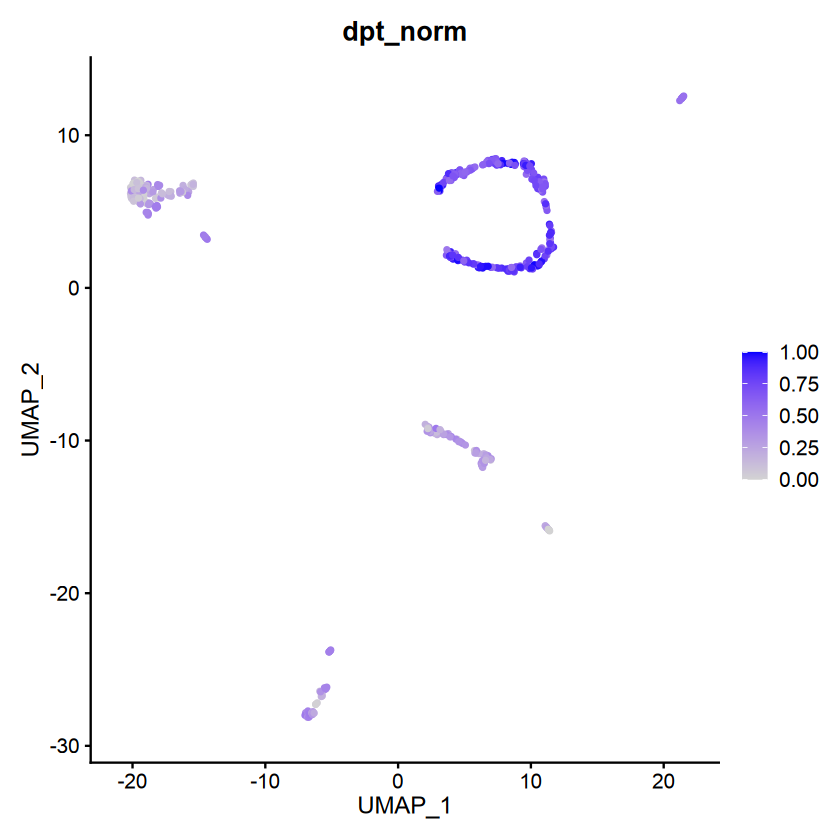

In [21]:
FeaturePlot(ss0, features = c("dpt_norm"), reduction = "umap")


# monocle

In [22]:
gene_annotation <- as.data.frame(sim_data@assays@data@listData$counts@Dimnames[[1]], row.names = sim_data@assays@data@listData$counts@Dimnames[[1]])
colnames(gene_annotation) <- "gene_short_name"

cds <- new_cell_data_set(sim_data@assays@data@listData$counts,
                         cell_metadata = sim_data@colData,
                         gene_metadata = gene_annotation)

In [23]:
cds <- preprocess_cds(cds, method = "PCA", num_dim = 20)

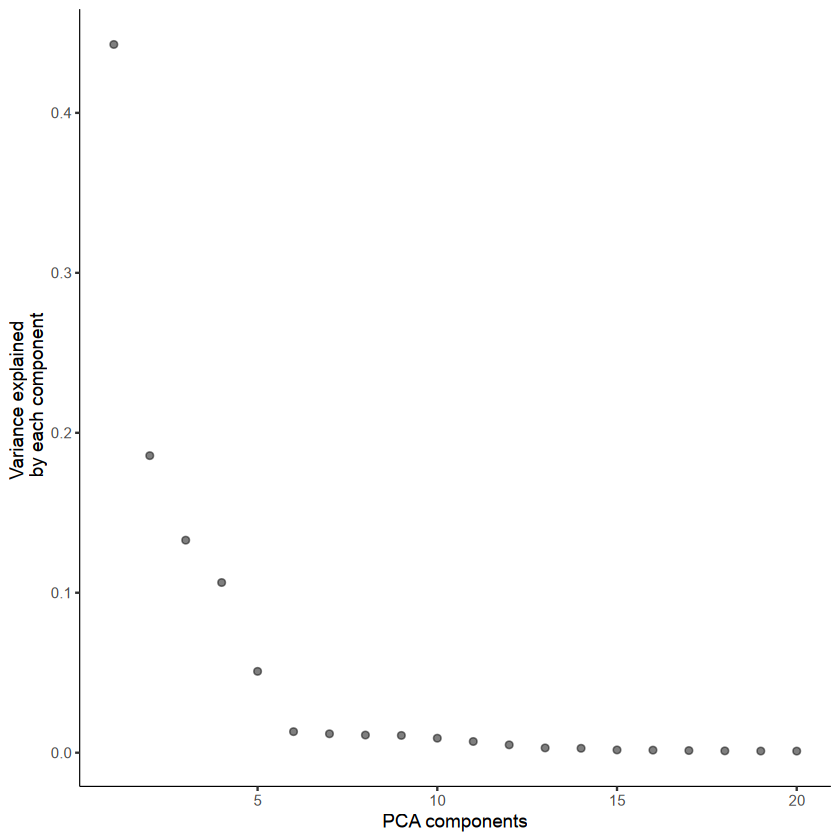

In [24]:
plot_pc_variance_explained(cds)

In [25]:
cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA")


No trajectory to plot. Has learn_graph() been called yet?

Cells aren't colored in a way that allows them to be grouped.



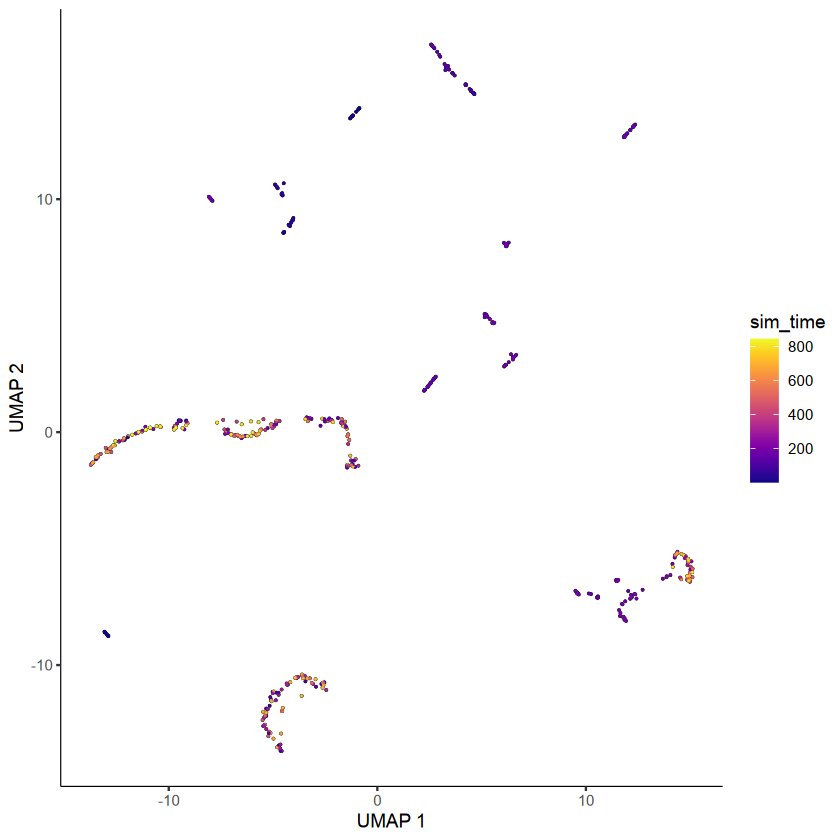

In [26]:
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "sim_time")

In [27]:
cds <- cluster_cells(cds, reduction_method = "UMAP")

No trajectory to plot. Has learn_graph() been called yet?



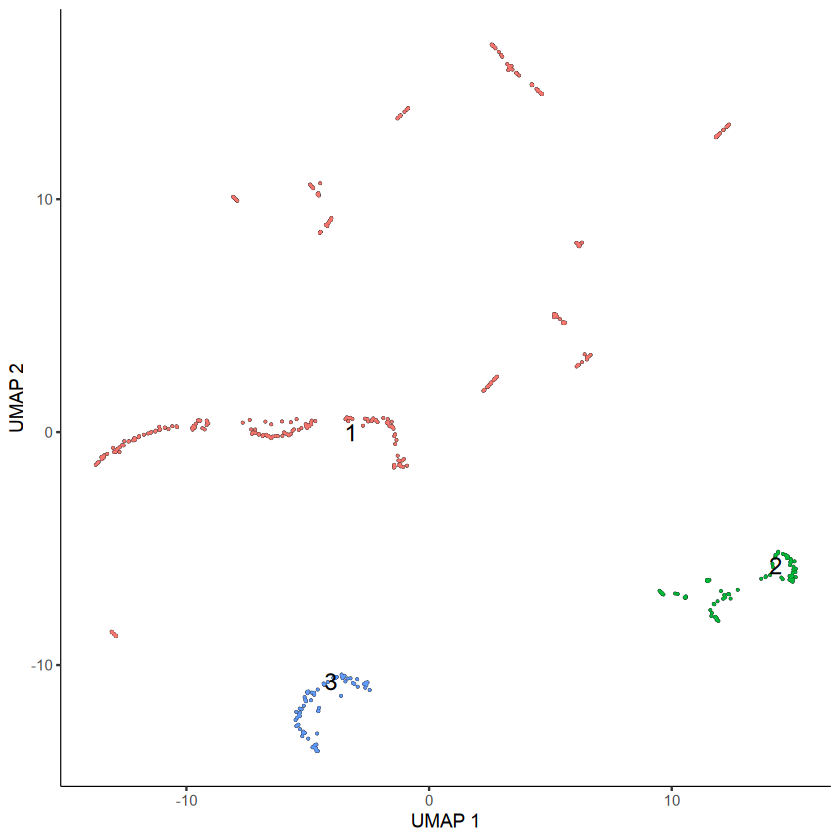

In [28]:
plot_cells(cds, reduction_method = "UMAP", color_cells_by = 'cluster', group_label_size = 5)     

In [29]:
cds <- learn_graph(cds, use_partition=TRUE)

  |======================================================================| 100%


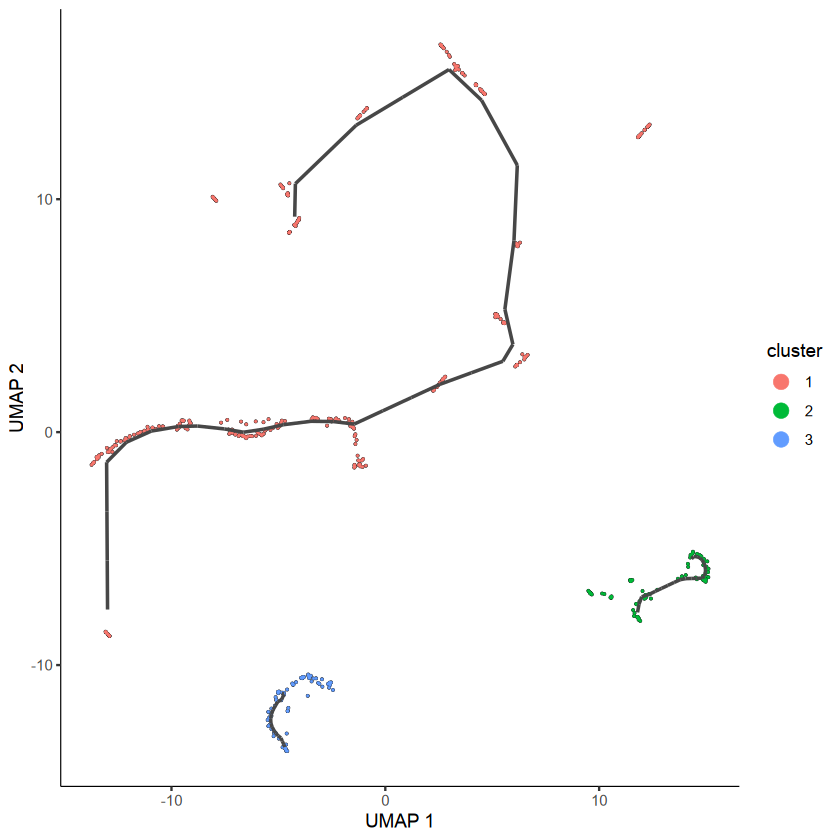

In [30]:
# visualise the learned trajectory
plot_cells(cds,
           # color_cells_by = "Cell_Type",
           label_cell_groups=FALSE,
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

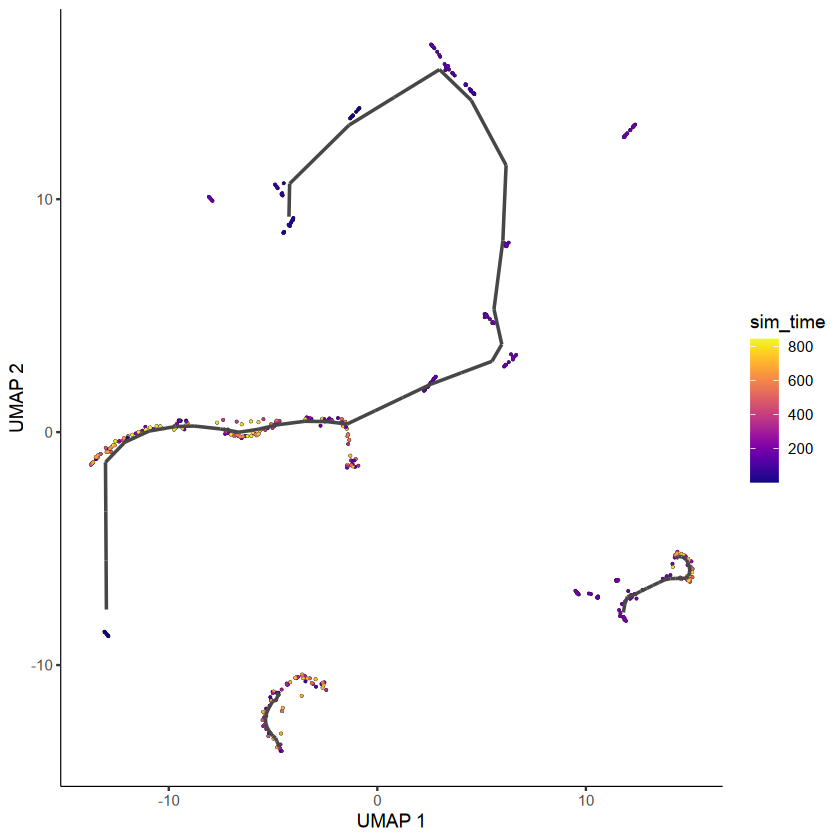

In [31]:
# visualise the learned trajectory
plot_cells(cds,
           color_cells_by = "sim_time",
           label_cell_groups=FALSE,
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

In [32]:
cds <- order_cells(cds, root_cells=root.use)

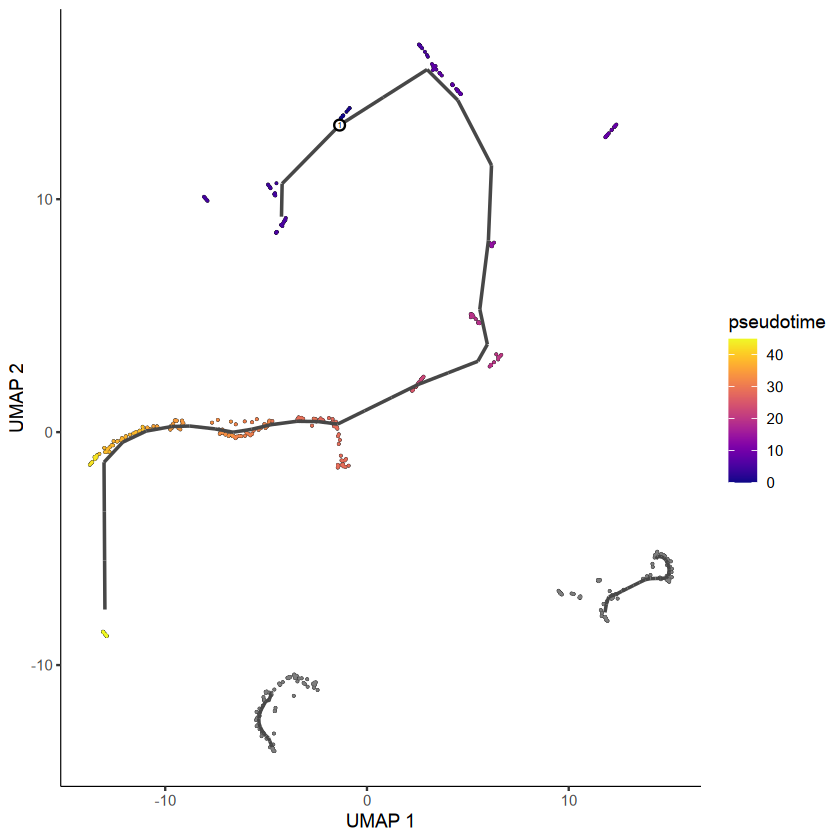

In [33]:
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

In [34]:
pseudotime <- pseudotime(cds) 

In [35]:
monocle3_rank <- rank(pseudotime,ties.method = 'random', na.last = 'keep')
monocle3_norm <- scales::rescale(monocle3_rank,to = c(0,1))

In [36]:
ss0@meta.data$monocle3_norm <- monocle3_norm
ss0@meta.data$monocle3 <- pseudotime

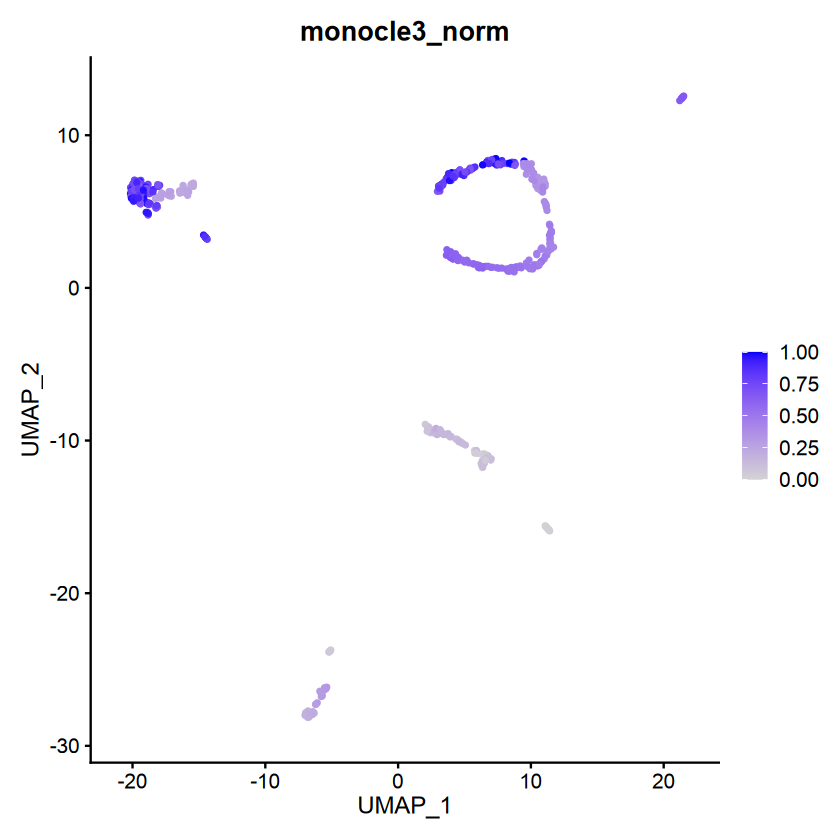

In [37]:
FeaturePlot(ss0, features = c("monocle3_norm"), reduction = "umap")

# TSCAN

In [38]:
exp <- as.matrix(ss0@assays$RNA@data)
procdata <- preprocess(exp, minexpr_value = 0, minexpr_percent = 0.001, cvcutoff = 0.01)


In [39]:
lpsmclust <- exprmclust(procdata)


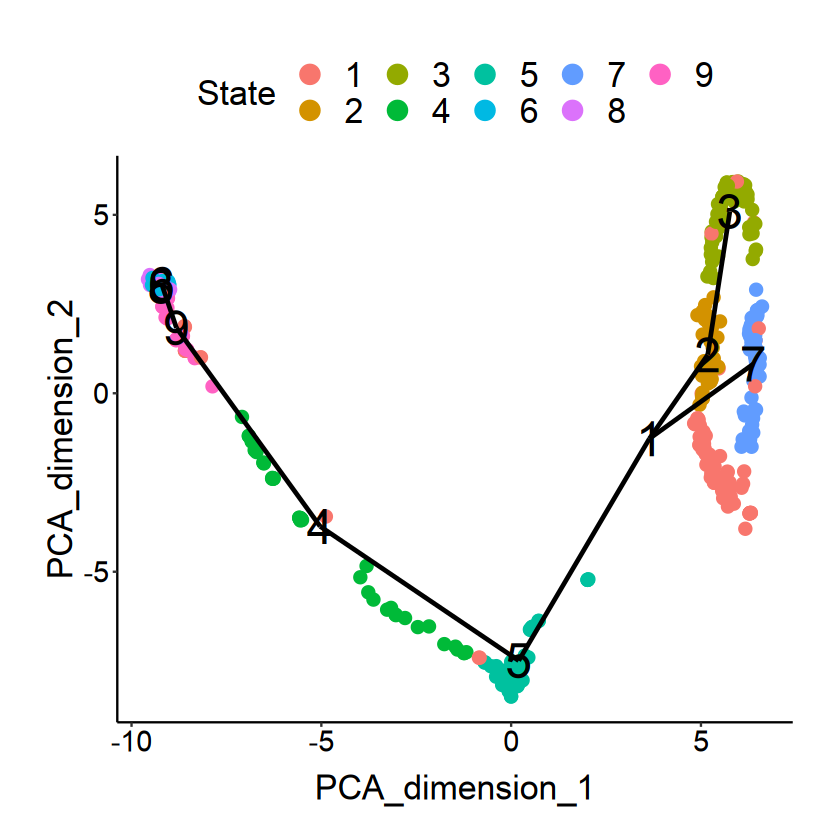

In [40]:
plotmclust(lpsmclust)

In [41]:
tscan_order = TSCANorder(lpsmclust)

In [42]:
tail(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell258,cell258,8,367
cell234,cell234,8,368
cell159,cell159,8,369
cell95,cell95,8,370
cell362,cell362,8,371
cell410,cell410,8,372


In [43]:
tscan_order[rownames(ss0@meta.data),"Pseudotime"]

[1]  NA 104   2 265  60 202 184 332  NA  NA 300 136  NA 215 214 309 142 338
 [19]  NA 207 334 135 178 123  94  NA 360 124  NA 112  18 226 319  NA 354 285
 [37]  96 117 340 159 209 105 365  43 130  NA   5 163 311 198 167  36  37 133
 [55] 204 229  NA  12  NA 161 364  NA  NA  NA  63 237 230 333  NA  38  13  10
 [73] 261 165 189  NA 193  NA  NA 151 266 134 281  46 109 322  70 247  34  45
 [91] 343 292 143  52 370  65 216 157 324  NA  30  75 185 321  88  NA 171  21
[109]  99 273  92  NA 220  76  55 262 223  NA 211  NA 255 236  NA 290 110  NA
[127] 176 250   9  NA 170 224 258  NA 107 305 174 179  NA 304 359 127  17  NA
[145] 349  77  59  NA 348 239  NA 131 225  NA 249 217  NA 169 369  NA 205 183
[163] 248 361  48  26 312  95 303  NA  NA 316  49  35  79 172 241 272 234 196
[181] 240 344 139  NA 351 219  NA  54 315  NA 173 326 323  58 270  57  NA 336
[199]  NA 100 356 111  NA  71 154 149  51  20  89 228 145 213 243  14 177  53
[217] 339  NA  80 307 256 242 122 313  81 277 158 301 263 260 320 233  NA 368
[235]  42 153 166 329 298 168 221 108  NA  41 188  NA 191  NA  56   4 264 342
[253]  68  33  NA  69  31 367 318 187  NA 147 164 114  NA 203   6  62   8 218
[271]  67 289 192 254  NA  NA 206 314  86 152 128 283 162  64 235 118  29  NA
[289] 210  78 366 294 144  NA 271  97 101 284 245 279 246  61 116  19  27 141
[307] 327 347  15 115 306  NA 299  25 121   3 335 138 200  24  NA 148 195  87
[325]  NA 297 346 274  NA 280  47  NA 155 350 267  85 257 308 212 337  NA 268
[343] 150  NA 251 181 269 126 132 353  98  39 120 106  23  NA 103 302  NA  66
[361] 276 371  50 125 190 156  NA 231 119 357  72 175  NA 146  NA 331 252 199
[379]  91   1  NA  NA 222 345  NA  NA 362 295  NA  93 201  NA 180 140 186  NA
[397] 113  NA 278  NA 244 317 208 182 137  NA 355 287  44 372  NA 102  74 286
[415] 296  11  83  32  NA  NA  16  73 310 325  90 160   7 363 259 288  NA 328
[433]  40 293 352 197  NA  NA 227 253 129 238  82 232 275  22  28 358 330  84
[451] 194 341 291 282

In [44]:
tscan_rank = rank(tscan_order[rownames(ss0@meta.data),"Pseudotime"], ties.method = 'random', na.last = 'keep')
tscan_norm = scales::rescale(tscan_rank,to = c(0,1))
ss0@meta.data$tscan_norm = tscan_norm
ss0@meta.data$tscan = tscan_order[rownames(ss0@meta.data),"Pseudotime"]

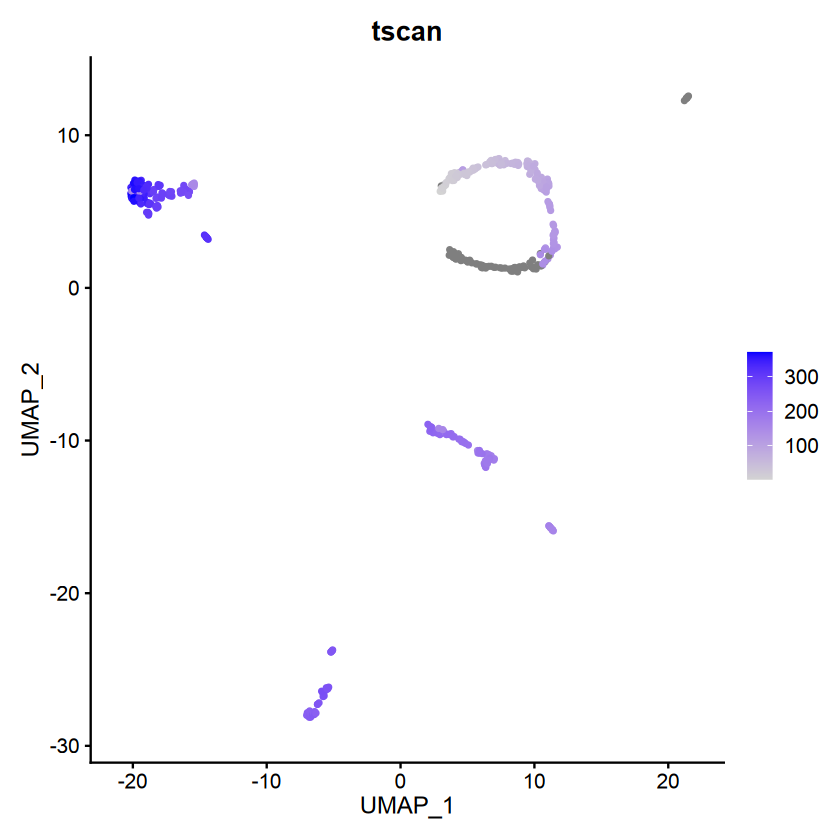

In [45]:
FeaturePlot(ss0, features = c("tscan"), reduction = "umap")

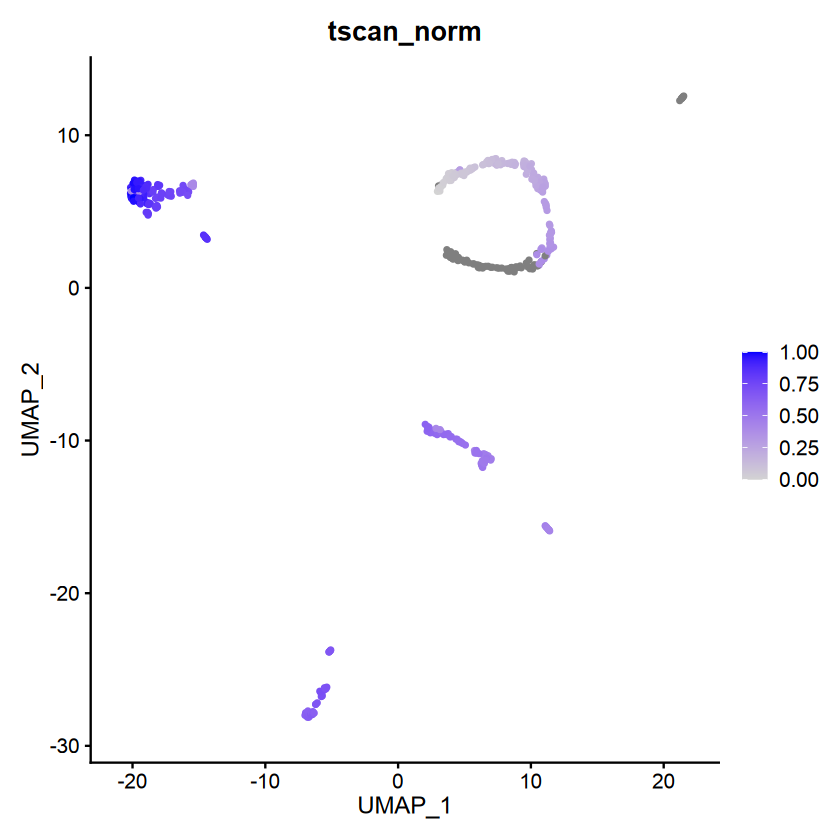

In [46]:
FeaturePlot(ss0, features = c("tscan_norm"), reduction = "umap")

# Comparison

In [47]:
long_df <- gather(ss0@meta.data[,c("dpt_norm", "monocle3_norm", "tscan_norm", "sim_time_norm", "Cell_Type", "lineage")],
                  key = "variable", value = "value", -sim_time_norm, -Cell_Type, -lineage)
colnames(long_df) = c('sim_time_norm', 'Cell_Type', 'lineage', 'method', 'value')
long_df$method[long_df$method=='dpt_norm'] = "DPT"
long_df$method[long_df$method=='monocle3_norm'] = "monocle3"
long_df$method[long_df$method=='tscan_norm'] = "TSCAN"
head(long_df)

,sim_time_norm,Cell_Type,lineage,method,value
,<dbl>,<chr>,<int>,<chr>,<dbl>
1,0.7969095,A,1,DPT,0.7064018
2,0.9293598,A,1,DPT,0.6754967
3,0.8587196,A,1,DPT,0.7969095
4,0.2362031,D,2,DPT,0.1633554
5,0.9028698,A,1,DPT,0.9933775
6,0.1501104,D,2,DPT,0.3752759


In [48]:
correlation_with_gt <- data.frame(
  method = c("ONTraC", "DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(ss0@meta.data$r, ss0@meta.data$Cell_NTScore, method = "spearman", use = "complete.obs")),
                  abs(cor(ss0@meta.data$r, ss0@meta.data$dpt, method = "spearman", use = "complete.obs")),
                  abs(cor(ss0@meta.data$r, ss0@meta.data$monocle3, method = "spearman", use = "complete.obs")),
                  abs(cor(ss0@meta.data$r, ss0@meta.data$tscan, method = "spearman", use = "complete.obs"))
                 )
)
head(correlation_with_gt)

,method,correlation
,<chr>,<dbl>
1,ONTraC,0.9880033
2,DPT,0.7422382
3,monocle3,0.3169626
4,TSCAN,0.6959934


In [49]:
all_correlation_with_gt = data.frame()
correlations_ = correlation_with_gt
correlations_$lineage = "all"
all_correlation_with_gt = rbind(all_correlation_with_gt, correlations_)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.9880033,all
DPT,0.7422382,all
monocle3,0.3169626,all
TSCAN,0.6959934,all


# Output

## correlation with r (truth NT)

In [50]:
all_correlation_with_gt$correlation = round(all_correlation_with_gt$correlation, 2)
all_correlation_with_gt
write.csv(all_correlation_with_gt,'Spearman_correlation_with_truth.csv')

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.99,all
DPT,0.74,all
monocle3,0.32,all
TSCAN,0.70,all


## pseudotime

In [51]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,388212,23,595.68285,A,-0.400000000,0.93397740,1,0.400000000,0.41038990,6,6,362,0.7969095,0.7064018,309373.07,0.5033113,33.282884,NA,NA
cell2,SeuratProject,464480,28,759.57758,A,0.400000000,-0.97018565,1,0.400000000,0.44172327,2,2,422,0.9293598,0.6754967,308107.51,0.4150110,29.413140,0.277628032,104
cell3,SeuratProject,508553,40,682.12469,A,-0.405309735,-0.82975244,1,0.405309735,0.49076736,3,3,390,0.8587196,0.7969095,311162.54,0.9580574,Inf,0.002695418,2
cell4,SeuratProject,683875,67,140.96162,D,0.000000000,-0.02347488,2,0.000000000,0.06888238,4,4,108,0.2362031,0.1633554,4420.94,0.3002208,22.579956,0.711590296,265
cell5,SeuratProject,495486,34,728.00217,A,0.405357143,-0.98190729,1,0.405357143,0.44803487,9,9,410,0.9028698,0.9933775,320219.13,0.7682119,Inf,0.159029650,60
cell6,SeuratProject,495019,24,90.29625,D,0.001769912,0.82813316,2,0.001769912,0.13516030,0,0,69,0.1501104,0.3752759,14263.14,0.1479029,7.284201,0.541778976,202


In [52]:
colnames(ss0@meta.data)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "sim_time"       
 [5] "Cell_Type"       "x"               "y"               "lineage"        
 [9] "r"               "Cell_NTScore"    "RNA_snn_res.2"   "seurat_clusters"
[13] "sim_time_rank"   "sim_time_norm"   "dpt_norm"        "dpt"            
[17] "monocle3_norm"   "monocle3"        "tscan_norm"      "tscan"

In [53]:
pseudotime_output = ss0@meta.data[,c('x', 'y', 'r', 'Cell_NTScore', 'dpt', 'monocle3','tscan','dpt_norm', 'monocle3_norm','tscan_norm')]
head(pseudotime_output)

,x,y,r,Cell_NTScore,dpt,monocle3,tscan,dpt_norm,monocle3_norm,tscan_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,-0.400000000,0.93397740,0.400000000,0.41038990,309373.07,33.282884,NA,0.7064018,0.5033113,NA
cell2,0.400000000,-0.97018565,0.400000000,0.44172327,308107.51,29.413140,104,0.6754967,0.4150110,0.277628032
cell3,-0.405309735,-0.82975244,0.405309735,0.49076736,311162.54,Inf,2,0.7969095,0.9580574,0.002695418
cell4,0.000000000,-0.02347488,0.000000000,0.06888238,4420.94,22.579956,265,0.1633554,0.3002208,0.711590296
cell5,0.405357143,-0.98190729,0.405357143,0.44803487,320219.13,Inf,60,0.9933775,0.7682119,0.159029650
cell6,0.001769912,0.82813316,0.001769912,0.13516030,14263.14,7.284201,202,0.3752759,0.1479029,0.541778976


In [54]:
head(pseudotime_output)

,x,y,r,Cell_NTScore,dpt,monocle3,tscan,dpt_norm,monocle3_norm,tscan_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,-0.400000000,0.93397740,0.400000000,0.41038990,309373.07,33.282884,NA,0.7064018,0.5033113,NA
cell2,0.400000000,-0.97018565,0.400000000,0.44172327,308107.51,29.413140,104,0.6754967,0.4150110,0.277628032
cell3,-0.405309735,-0.82975244,0.405309735,0.49076736,311162.54,Inf,2,0.7969095,0.9580574,0.002695418
cell4,0.000000000,-0.02347488,0.000000000,0.06888238,4420.94,22.579956,265,0.1633554,0.3002208,0.711590296
cell5,0.405357143,-0.98190729,0.405357143,0.44803487,320219.13,Inf,60,0.9933775,0.7682119,0.159029650
cell6,0.001769912,0.82813316,0.001769912,0.13516030,14263.14,7.284201,202,0.3752759,0.1479029,0.541778976


In [55]:
colnames(pseudotime_output) = c('x', 'y', 'r', 'ONTraC',
                                'DPT', 'monocle3', 'TSCAN', 
                                'DPT_norm', 'monocle3_norm', 'TSCAN_norm')
head(pseudotime_output)

,x,y,r,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,TSCAN_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,-0.400000000,0.93397740,0.400000000,0.41038990,309373.07,33.282884,NA,0.7064018,0.5033113,NA
cell2,0.400000000,-0.97018565,0.400000000,0.44172327,308107.51,29.413140,104,0.6754967,0.4150110,0.277628032
cell3,-0.405309735,-0.82975244,0.405309735,0.49076736,311162.54,Inf,2,0.7969095,0.9580574,0.002695418
cell4,0.000000000,-0.02347488,0.000000000,0.06888238,4420.94,22.579956,265,0.1633554,0.3002208,0.711590296
cell5,0.405357143,-0.98190729,0.405357143,0.44803487,320219.13,Inf,60,0.9933775,0.7682119,0.159029650
cell6,0.001769912,0.82813316,0.001769912,0.13516030,14263.14,7.284201,202,0.3752759,0.1479029,0.541778976


In [56]:
write.csv(pseudotime_output, "pseudotime_output.csv")

## UMAP embeddings

In [57]:
str(ss0@reductions$umap, 2)

Formal class 'DimReduc' [package "SeuratObject"] with 9 slots
  ..@ cell.embeddings           : num [1:454, 1:2] 10.43 10.88 3.15 -5.9 8.51 ...
  .. ..- attr(*, "scaled:center")= num [1:2] -1.904 -0.354
  .. ..- attr(*, "dimnames")=List of 2
  ..@ feature.loadings          : num[0 , 0 ] 
  ..@ feature.loadings.projected: num[0 , 0 ] 
  ..@ assay.used                : chr "RNA"
  ..@ global                    : logi TRUE
  ..@ stdev                     : num(0) 
  ..@ key                       : chr "UMAP_"
  ..@ jackstraw                 :Formal class 'JackStrawData' [package "SeuratObject"] with 4 slots
  ..@ misc                      : list()


In [58]:
write.csv(ss0@reductions$umap@cell.embeddings,'UMAP_embeddings.csv')

# Lineages

In [59]:
unique(ss0@meta.data$lineage)

[1] 1 2

# Lineage 1

## subset sce and seurat

In [60]:
sim_data_l1 <- sim_data[,sim_data@colData$lineage == 1]

In [61]:
dim(sim_data_l1)

[1] 100 227

In [62]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,388212,23,595.68285,A,-0.400000000,0.93397740,1,0.400000000,0.41038990,6,6,362,0.7969095,0.7064018,309373.07,0.5033113,33.282884,NA,NA
cell2,SeuratProject,464480,28,759.57758,A,0.400000000,-0.97018565,1,0.400000000,0.44172327,2,2,422,0.9293598,0.6754967,308107.51,0.4150110,29.413140,0.277628032,104
cell3,SeuratProject,508553,40,682.12469,A,-0.405309735,-0.82975244,1,0.405309735,0.49076736,3,3,390,0.8587196,0.7969095,311162.54,0.9580574,Inf,0.002695418,2
cell4,SeuratProject,683875,67,140.96162,D,0.000000000,-0.02347488,2,0.000000000,0.06888238,4,4,108,0.2362031,0.1633554,4420.94,0.3002208,22.579956,0.711590296,265
cell5,SeuratProject,495486,34,728.00217,A,0.405357143,-0.98190729,1,0.405357143,0.44803487,9,9,410,0.9028698,0.9933775,320219.13,0.7682119,Inf,0.159029650,60
cell6,SeuratProject,495019,24,90.29625,D,0.001769912,0.82813316,2,0.001769912,0.13516030,0,0,69,0.1501104,0.3752759,14263.14,0.1479029,7.284201,0.541778976,202


In [63]:
seurat_l1 = subset(ss0, cells=rownames(ss0@meta.data[ss0@meta.data$lineage == 1,]))

In [64]:
dim(seurat_l1)

[1] 100 227

## DPT

In [65]:
dm.use.1 <- DiffusionMap(data = sim_data_l1)

Warning message in (function (data, k, ..., query = NULL, distance = c("euclidean", :
“find_knn does not yet support sparse matrices, converting data to a dense matrix.”


In [66]:
rownames(seurat_l1@meta.data[seurat_l1@meta.data$sim_time==min(seurat_l1@meta.data$sim_time),])
#cell431

[1] "cell431"

In [67]:
rownames(seurat_l1@meta.data[seurat_l1@meta.data$sim_time==max(seurat_l1@meta.data$sim_time),])
#cell255

[1] "cell255"

In [68]:
seurat_l1[['dmap']] <- CreateDimReducObject(embeddings = dm.use.1@eigenvectors,
                                            assay = 'RNA',
                                            stdev = dm.use.1@eigenvalues,
                                            key = 'DC_')


In [69]:
root.use = c('cell431')#,'cell255')

dpt.use.1 = DPT(dm.use.1,tips = c(1,2))#match(root.use,rownames(dm.use.1@eigenvectors)))  # not sure what happend here, use random index here.
dpt_l1_rank = rank(dpt.use.1$dpt,ties.method = 'random', na.last = 'keep')
seurat_l1@meta.data$dpt_l1_norm <- scales::rescale(dpt_l1_rank,to = c(0,1))
seurat_l1@meta.data$dpt_l1 = dpt.use.1$dpt

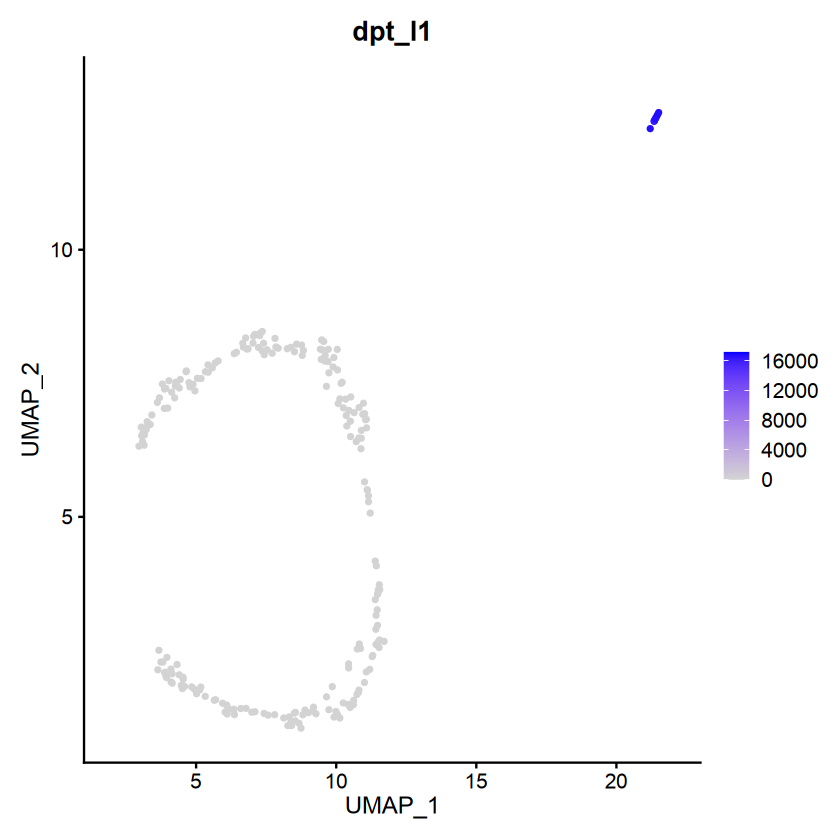

In [70]:
FeaturePlot(seurat_l1, features = c("dpt_l1"), reduction = "umap")

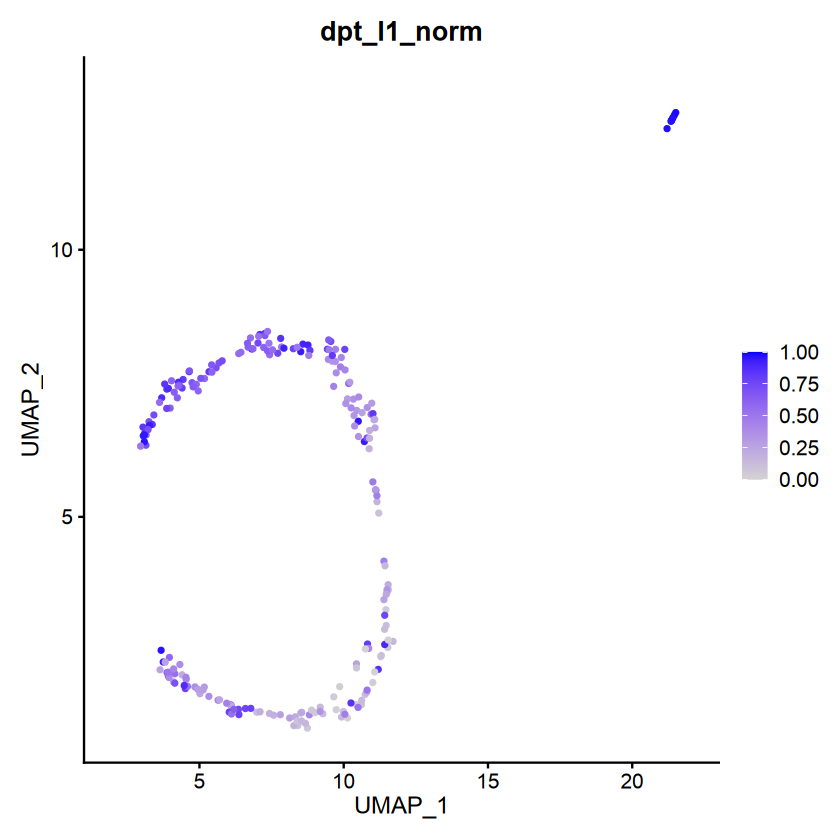

In [71]:
FeaturePlot(seurat_l1, features = c("dpt_l1_norm"), reduction = "umap")

## monocle

In [72]:
gene_annotation <- as.data.frame(sim_data_l1@assays@data@listData$counts@Dimnames[[1]], row.names = sim_data_l1@assays@data@listData$counts@Dimnames[[1]])
colnames(gene_annotation) <- "gene_short_name"

cds <- new_cell_data_set(sim_data_l1@assays@data@listData$counts,
                         cell_metadata = sim_data_l1@colData,
                         gene_metadata = gene_annotation)

In [73]:
cds <- preprocess_cds(cds, method = "PCA", num_dim = 20)

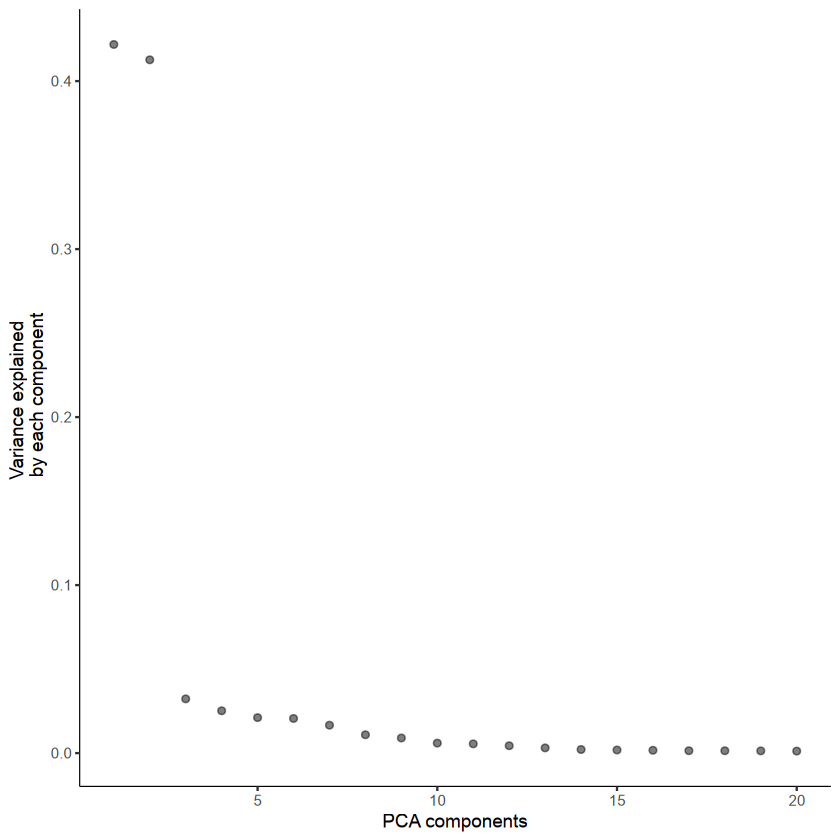

In [74]:
plot_pc_variance_explained(cds)

In [75]:
# cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA", umap.min_dist=0.5, umap.n_neighbors= 15L)
cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA")

In [76]:
cds <- cluster_cells(cds, reduction_method = "UMAP")

In [77]:
cds <- learn_graph(cds, use_partition=TRUE)

In [78]:
cds <- order_cells(cds, root_cells=root.use)

In [79]:
pseudotime <- pseudotime(cds) 

In [80]:
length(pseudotime)

[1] 227

In [81]:
monocle3_l1_rank <- rank(pseudotime,ties.method = 'random', na.last = 'keep')
monocle3_l1_norm <- scales::rescale(monocle3_l1_rank,to = c(0,1))

In [82]:
seurat_l1@meta.data$monocle3_l1_norm <- monocle3_l1_norm
seurat_l1@meta.data$monocle3_l1 <- pseudotime

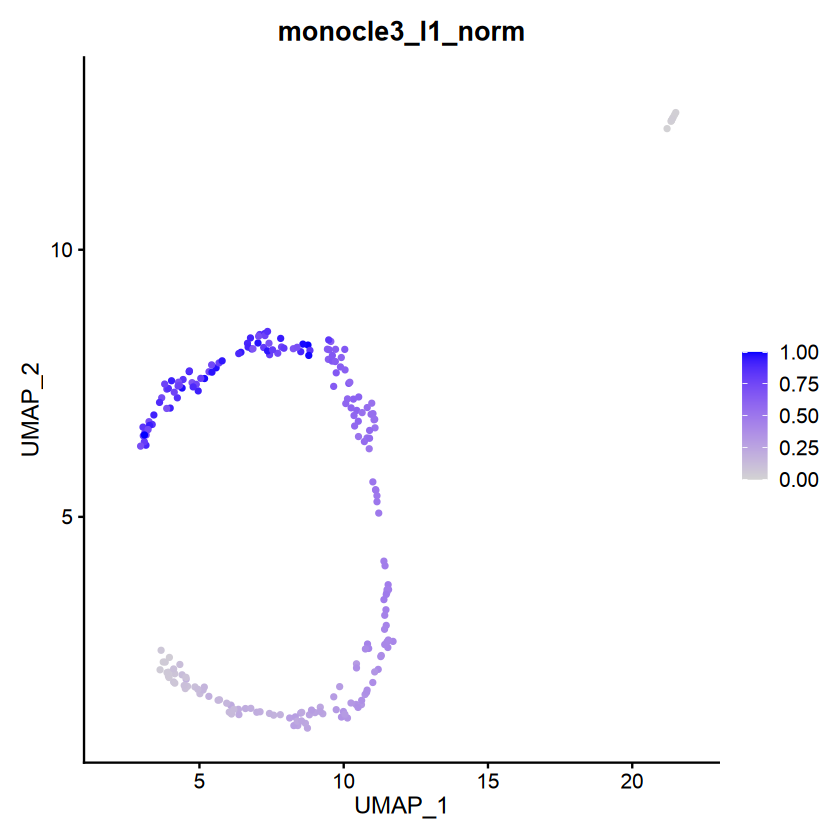

In [83]:
FeaturePlot(seurat_l1, features = c("monocle3_l1_norm"), reduction = "umap")

## TSCAN

In [84]:
library(TSCAN)

In [85]:
exp <- as.matrix(seurat_l1@assays$RNA@data)
procdata <- preprocess(exp, minexpr_value = 0, minexpr_percent = 0.001, cvcutoff = 0.01)


In [86]:
lpsmclust <- exprmclust(procdata)
tscan_order = TSCANorder(lpsmclust)

In [87]:
str(lpsmclust, 2)

List of 4
 $ pcareduceres: num [1:227, 1:4] 2.79 -4.18 2.53 -5.05 6.31 ...
  ..- attr(*, "dimnames")=List of 2
 $ MSTtree     :Class 'igraph'  hidden list of 10
  ..$ : num 9
  ..$ : logi FALSE
  ..$ : num [1:8] 1 5 7 8 6 8 4 5
  ..$ : num [1:8] 0 0 0 1 2 2 3 3
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ :List of 4
  ..$ :<environment: 0x55c89a461a00> 
 $ clusterid   : Named int [1:227] 1 9 3 3 4 5 1 6 1 5 ...
  ..- attr(*, "names")= chr [1:227] "cell1" "cell2" "cell3" "cell5" ...
 $ clucenter   : num [1:9, 1:4] 2.08 -2.3 -2.76 6.19 5.76 ...


In [88]:
head(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell10,cell10,5,1
cell396,cell396,5,2
cell19,cell19,5,3
cell29,cell29,5,4
cell398,cell398,5,5
cell265,cell265,5,6


In [89]:
tail(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell447,cell447,7,207
cell314,cell314,7,208
cell101,cell101,7,209
cell287,cell287,7,210
cell446,cell446,7,211
cell355,cell355,7,212


In [90]:
tscan_order[rownames(seurat_l1@meta.data),"Pseudotime"]

[1]  76 111 155 153  40   1  83  56  80   3  87  96 121  52  95   4 104 204
 [19]  13 114 102  64 184  90  18 173 186 190  86  NA 177   7  58  44  57 152
 [37]  24 187 196 178  27  NA  NA  88 174  61 143 194 183  78 168 147  22 209
 [55] 139 126  69 192 109 120  65 138 160  47  51  NA  67  11 170  77   8  63
 [73]  17  70 203  36 136 154  42  39  71   9  31  33 165 201 118  NA  28 171
 [91] 199 137  81  32  43 164  30 156 159  49  60 110 107  54 140 162 197 122
[109]  73 180 163  NA 133 100 134  74 175  62  NA 185  55  50 161 158 145 191
[127]  14 144 198  12 105   6 166 151 176 148  21  NA 128  92 149 101 210  NA
[145] 135  NA  NA 116 115 150 103 202 200  82 195 106  75 208  99 169  85 206
[163]  38 125  NA  41 181  NA 127  59  34  93  89 117 188  97  66 212  23 113
[181]  35 146 167  94  37  98 142  16  53 124 157  25  NA  68  79  46 119  15
[199]  72   2 108   5  45  84  10 182  26 112 132 179 130 193  48  19 205 141
[217] 123 172  NA 189  20  29  91 131 211 207 129

In [91]:
tscan_l1_rank = rank(tscan_order[rownames(seurat_l1@meta.data),"Pseudotime"], ties.method = 'random', na.last = 'keep')
tscan_l1_norm = scales::rescale(tscan_l1_rank,to = c(0,1))
seurat_l1@meta.data$tscan_l1_norm = tscan_l1_norm
seurat_l1@meta.data$tscan_l1 = tscan_order[rownames(seurat_l1@meta.data),"Pseudotime"]

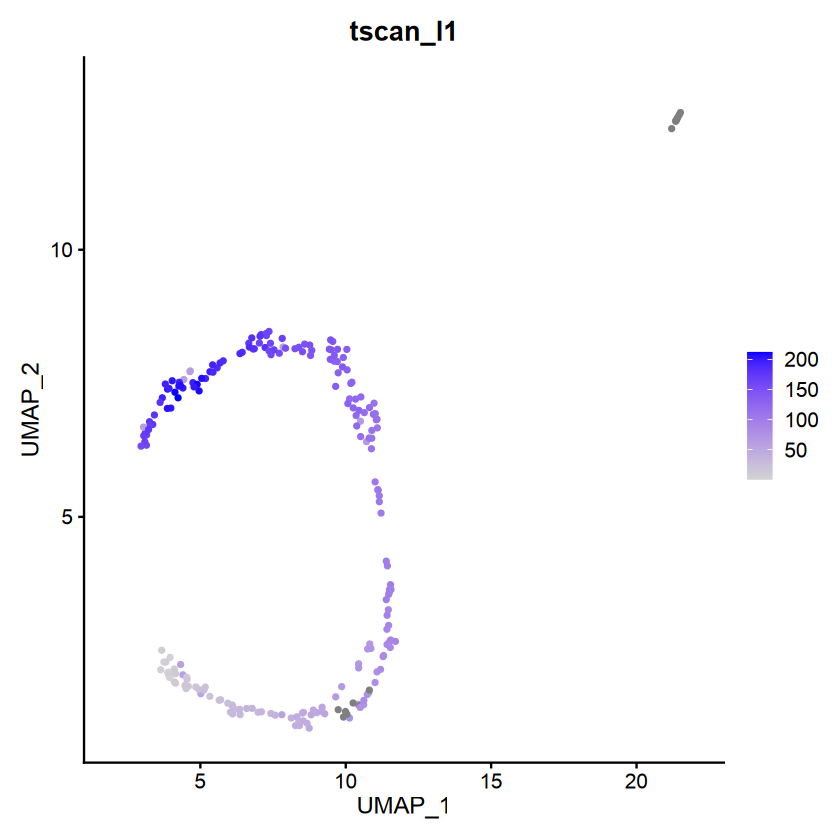

In [92]:
FeaturePlot(seurat_l1, features = c("tscan_l1"), reduction = "umap")

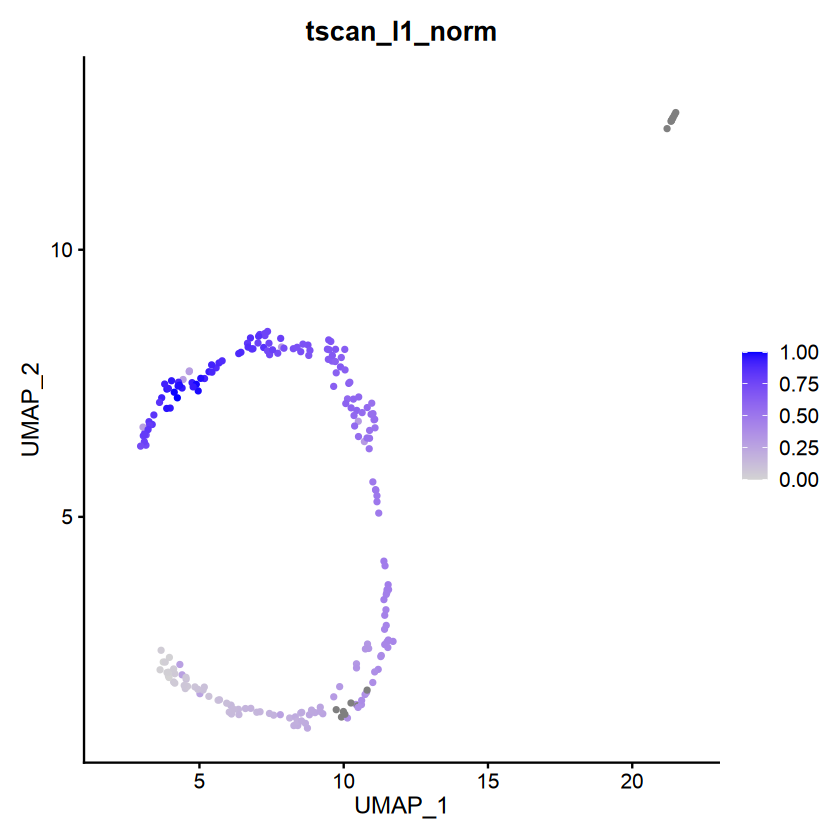

In [93]:
FeaturePlot(seurat_l1, features = c("tscan_l1_norm"), reduction = "umap")

## comparison

In [94]:
head(seurat_l1@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,⋯,monocle3_norm,monocle3,tscan_norm,tscan,dpt_l1_norm,dpt_l1,monocle3_l1_norm,monocle3_l1,tscan_l1_norm,tscan_l1
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,388212,23,595.6828,A,-0.4000000,0.93397740,1,0.4000000,0.4103899,⋯,0.5033113,33.28288,NA,NA,0.0000000,0.00000,0.32743363,24.45571,0.3554502,76
cell2,SeuratProject,464480,28,759.5776,A,0.4000000,-0.97018565,1,0.4000000,0.4417233,⋯,0.4150110,29.41314,0.277628032,104,0.1814159,16.22265,0.50000000,28.98852,0.5213270,111
cell3,SeuratProject,508553,40,682.1247,A,-0.4053097,-0.82975244,1,0.4053097,0.4907674,⋯,0.9580574,Inf,0.002695418,2,0.5442478,29.59998,0.73451327,Inf,0.7298578,155
cell5,SeuratProject,495486,34,728.0022,A,0.4053571,-0.98190729,1,0.4053571,0.4480349,⋯,0.7682119,Inf,0.159029650,60,0.9424779,56.64338,0.90707965,Inf,0.7203791,153
cell9,SeuratProject,421233,29,398.5391,A,-0.4106195,-0.06026377,1,0.4106195,0.4965796,⋯,0.5452539,34.86837,NA,NA,0.2831858,19.14919,0.27433628,21.34201,0.1848341,40
cell10,SeuratProject,550101,31,258.8223,A,0.4107143,0.57497716,1,0.4107143,0.4685184,⋯,0.6291391,42.81825,NA,NA,0.9292035,49.53684,0.03539823,14.72148,0.0000000,1


In [95]:
seurat_l1@meta.data$dpt_l1_rank = rank(seurat_l1@meta.data$dpt, ties.method = 'random', na.last = 'keep')
seurat_l1@meta.data$dpt_l1_norm <- scales::rescale(seurat_l1@meta.data$dpt_l1_rank,to = c(0,1))


In [96]:
seurat_l1@meta.data$sim_time_l1_rank = rank(seurat_l1@meta.data$sim_time, ties.method = 'random', na.last = 'keep')
seurat_l1@meta.data$sim_time_l1_norm <- scales::rescale(seurat_l1@meta.data$sim_time_l1_rank,to = c(0,1))

In [97]:
long_df <- gather(seurat_l1@meta.data[,c("dpt_l1_norm", "monocle3_l1_norm", "sim_time_l1_norm", "Cell_Type", "lineage")], key = "variable", value = "value", -sim_time_l1_norm, -Cell_Type, -lineage)
colnames(long_df) = c('sim_time_l1_norm', 'Cell_Type', 'lineage', 'method', 'value')
long_df$method[long_df$method=='dpt_l1_norm'] = "DPT"
long_df$method[long_df$method=='monocle3_l1_norm'] = "monocle3"
long_df$method[long_df$method=='tscan_l1_norm'] = "TSCAN"
head(long_df)

,sim_time_l1_norm,Cell_Type,lineage,method,value
,<dbl>,<chr>,<int>,<chr>,<dbl>
1,0.6548673,A,1,DPT,0.41150442
2,0.8849558,A,1,DPT,0.34955752
3,0.7610619,A,1,DPT,0.59292035
4,0.8407080,A,1,DPT,0.98672566
5,0.4646018,A,1,DPT,0.79203540
6,0.3053097,A,1,DPT,0.01327434


In [98]:
cor.test(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$dpt_l1_norm, na.rm=T)$estimate
cor.test(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$monocle3_l1_norm, na.rm=T)$estimate
cor.test(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$tscan_l1_norm, na.rm=T)$estimate


cor 
0.1245453

cor 
-0.04354503

cor 
-0.1866278

In [99]:
correlations <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$dpt_l1_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$monocle3_l1_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l1@meta.data$sim_time_l1_norm, seurat_l1@meta.data$tscan_l1_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlations)

,method,correlation
,<chr>,<dbl>
1,DPT,0.12454526
2,monocle3,0.04354503
3,TSCAN,0.18575856


In [100]:
correlation_with_gt <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l1@meta.data$r, seurat_l1@meta.data$dpt_l1_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l1@meta.data$r, seurat_l1@meta.data$monocle3_l1_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l1@meta.data$r, seurat_l1@meta.data$tscan_l1_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlation_with_gt)

,method,correlation
,<chr>,<dbl>
1,DPT,0.058296721
2,monocle3,0.001249054
3,TSCAN,0.051375170


In [101]:
correlations_ = correlation_with_gt
correlations_$lineage = "lineage1"
all_correlation_with_gt = rbind(all_correlation_with_gt, correlations_)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.990000000,all
DPT,0.740000000,all
monocle3,0.320000000,all
TSCAN,0.700000000,all
DPT,0.058296721,lineage1
monocle3,0.001249054,lineage1
TSCAN,0.051375170,lineage1


In [102]:
long_df <- left_join(long_df, correlations, by = "method")
head(long_df)

,sim_time_l1_norm,Cell_Type,lineage,method,value,correlation
,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,0.6548673,A,1,DPT,0.41150442,0.1245453
2,0.8849558,A,1,DPT,0.34955752,0.1245453
3,0.7610619,A,1,DPT,0.59292035,0.1245453
4,0.8407080,A,1,DPT,0.98672566,0.1245453
5,0.4646018,A,1,DPT,0.79203540,0.1245453
6,0.3053097,A,1,DPT,0.01327434,0.1245453


Saving 6.67 x 6.67 in image


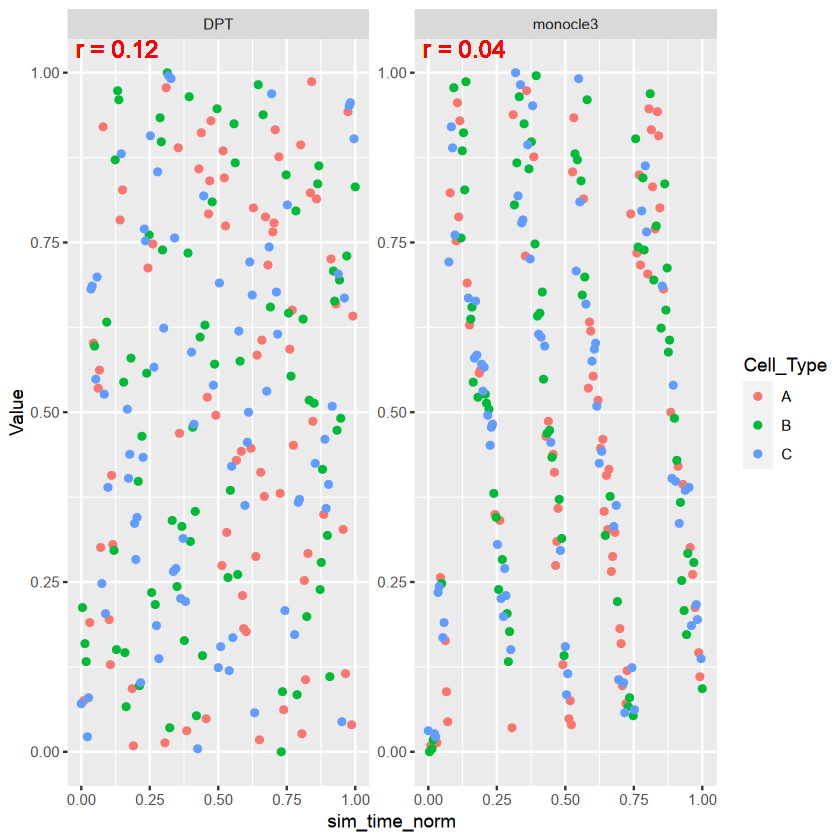

In [103]:
ggplot(long_df, aes(x = sim_time_l1_norm, y = value, color=Cell_Type, palette="Set1")) + 
  geom_point() + 
  facet_wrap(~method, scales = "free") +
  geom_text(aes(label = paste("r =", round(correlation, 2))), x = -Inf, y = Inf, hjust = -0.1, vjust = 1.1, color = "red", size = 5) +
  xlab("sim_time_norm") + 
  ylab("Value")
ggsave("Pseudotime_lineage1_comparison_cell_type.pdf")

# Lineage 2

## subset sce and seurat

In [104]:
sim_data_l2 <- sim_data[,sim_data@colData$lineage == 2]

In [105]:
dim(sim_data_l2)

[1] 100 227

In [106]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,388212,23,595.68285,A,-0.400000000,0.93397740,1,0.400000000,0.41038990,6,6,362,0.7969095,0.7064018,309373.07,0.5033113,33.282884,NA,NA
cell2,SeuratProject,464480,28,759.57758,A,0.400000000,-0.97018565,1,0.400000000,0.44172327,2,2,422,0.9293598,0.6754967,308107.51,0.4150110,29.413140,0.277628032,104
cell3,SeuratProject,508553,40,682.12469,A,-0.405309735,-0.82975244,1,0.405309735,0.49076736,3,3,390,0.8587196,0.7969095,311162.54,0.9580574,Inf,0.002695418,2
cell4,SeuratProject,683875,67,140.96162,D,0.000000000,-0.02347488,2,0.000000000,0.06888238,4,4,108,0.2362031,0.1633554,4420.94,0.3002208,22.579956,0.711590296,265
cell5,SeuratProject,495486,34,728.00217,A,0.405357143,-0.98190729,1,0.405357143,0.44803487,9,9,410,0.9028698,0.9933775,320219.13,0.7682119,Inf,0.159029650,60
cell6,SeuratProject,495019,24,90.29625,D,0.001769912,0.82813316,2,0.001769912,0.13516030,0,0,69,0.1501104,0.3752759,14263.14,0.1479029,7.284201,0.541778976,202


In [107]:
seurat_l2 = subset(ss0, cells=rownames(ss0@meta.data[ss0@meta.data$lineage == 2,]))

In [108]:
dim(seurat_l2)

[1] 100 227

## DPT

In [109]:
dm.use.2 <- DiffusionMap(data = sim_data_l2)

Warning message in (function (data, k, ..., query = NULL, distance = c("euclidean", :
“find_knn does not yet support sparse matrices, converting data to a dense matrix.”


In [110]:
#cell40
rownames(seurat_l2@meta.data[seurat_l2@meta.data$sim_time==min(seurat_l2@meta.data$sim_time),])


[1] "cell40"

In [111]:
rownames(seurat_l2@meta.data[seurat_l2@meta.data$sim_time==max(seurat_l2@meta.data$sim_time),])
#cell291

[1] "cell291"

In [112]:
seurat_l2[['dmap']] <- CreateDimReducObject(embeddings = dm.use.2@eigenvectors,
                                            assay = 'RNA',
                                            stdev = dm.use.2@eigenvalues,
                                            key = 'DC_')

In [113]:
root.use = c('cell40','cell291')

dpt.use.2 = DPT(dm.use.2,tips = match(root.use,rownames(dm.use.2@eigenvectors)))
dpt_l2_rank = rank(dpt.use.2$dpt,ties.method = 'random', na.last = 'keep')
seurat_l2@meta.data$dpt_l2_norm <- scales::rescale(dpt_l2_rank,to = c(0,1))
seurat_l2@meta.data$dpt_l2 = dpt.use.2$dpt

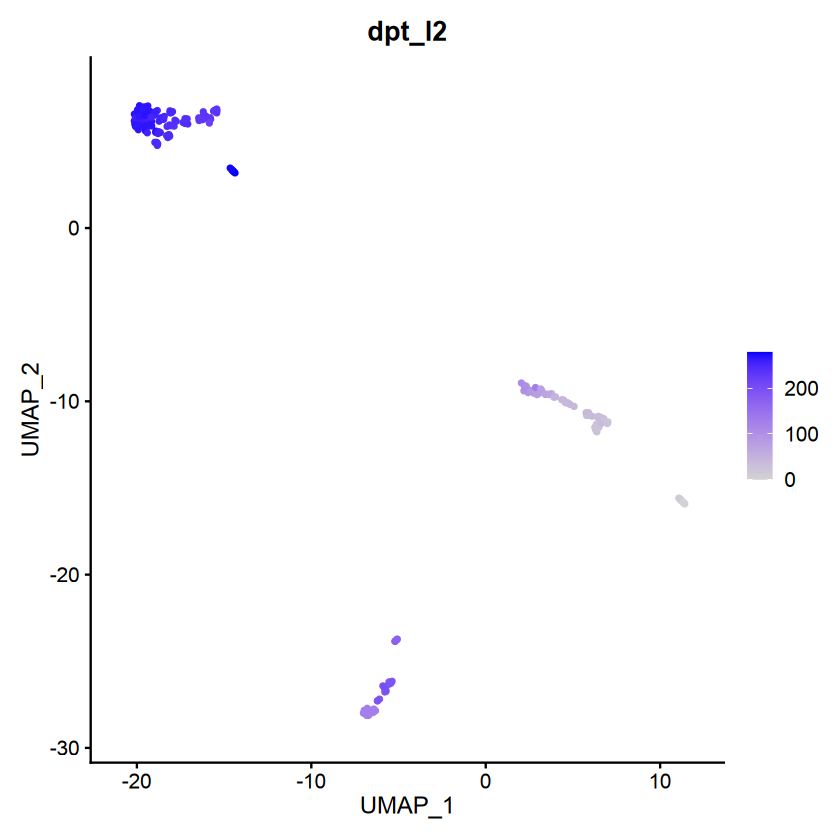

In [114]:
FeaturePlot(seurat_l2, features = c("dpt_l2"), reduction = "umap")

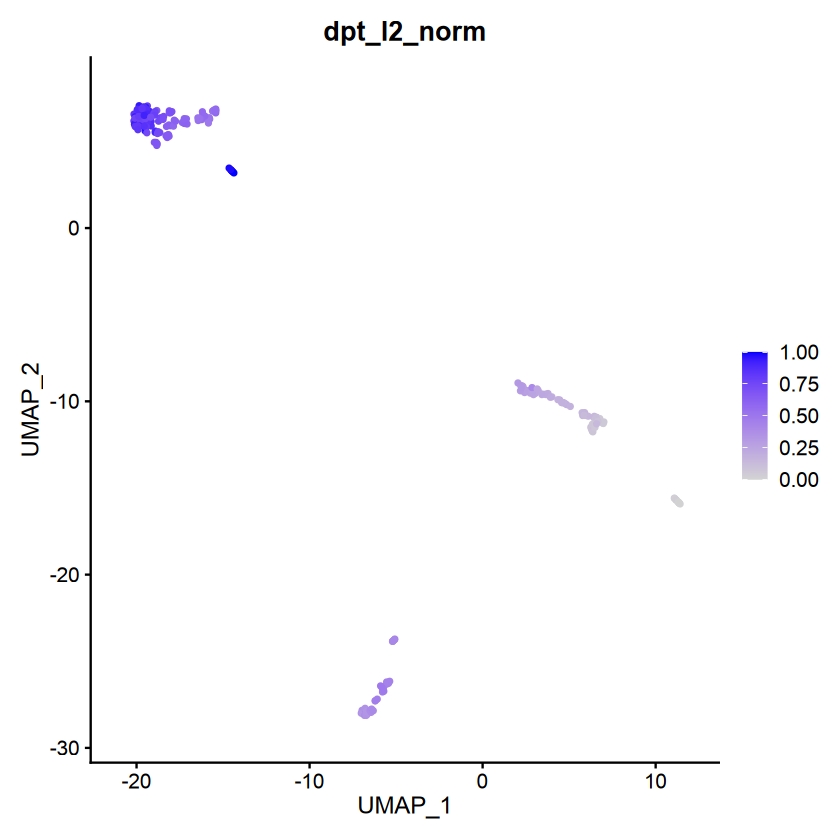

In [115]:
FeaturePlot(seurat_l2, features = c("dpt_l2_norm"), reduction = "umap")

## monocle

In [116]:
gene_annotation <- as.data.frame(sim_data_l2@assays@data@listData$counts@Dimnames[[1]],
                                 row.names = sim_data_l2@assays@data@listData$counts@Dimnames[[1]])
colnames(gene_annotation) <- "gene_short_name"

cds <- new_cell_data_set(sim_data_l2@assays@data@listData$counts,
                         cell_metadata = sim_data_l2@colData,
                         gene_metadata = gene_annotation)

In [117]:
cds <- preprocess_cds(cds, method = "PCA", num_dim = 20)

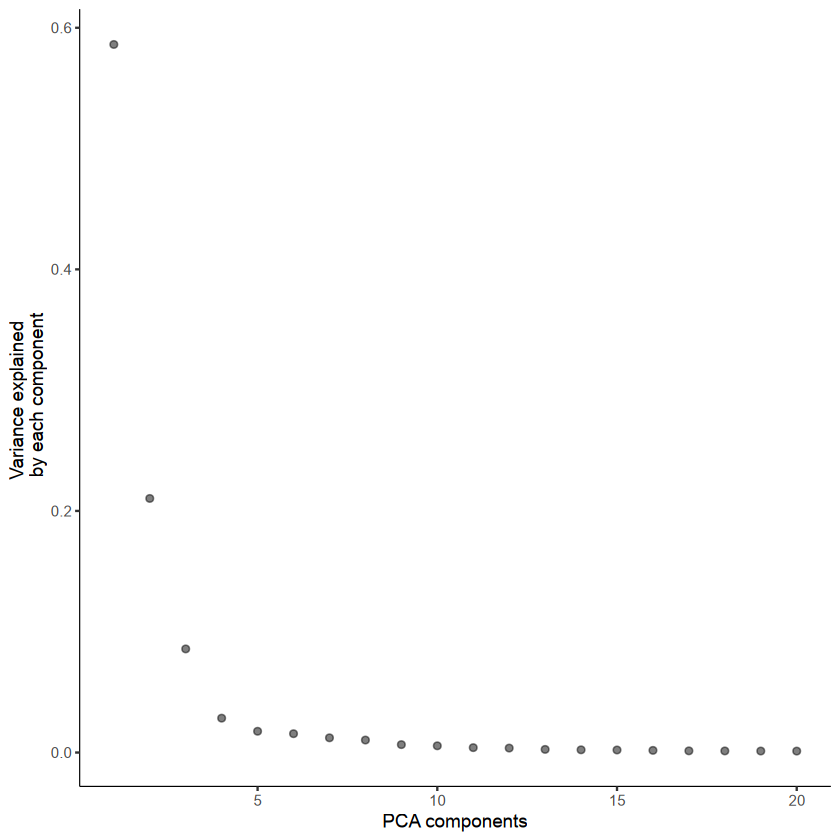

In [118]:
plot_pc_variance_explained(cds)

In [119]:
# cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA", umap.min_dist=0.5, umap.n_neighbors= 15L)
cds <- reduce_dimension(cds, reduction_method = "UMAP", preprocess_method = "PCA")

In [120]:
cds <- cluster_cells(cds, reduction_method = "UMAP")

In [121]:
cds <- learn_graph(cds, use_partition=TRUE)

In [122]:
cds <- order_cells(cds, root_cells=root.use)

In [123]:
pseudotime <- pseudotime(cds) 

In [124]:
length(pseudotime)

[1] 227

In [125]:
monocle3_l2_rank <- rank(pseudotime,ties.method = 'random', na.last = 'keep')
monocle3_l2_norm <- scales::rescale(monocle3_l2_rank,to = c(0,1))

In [126]:
seurat_l2@meta.data$monocle3_l2_norm <- monocle3_l2_norm
seurat_l2@meta.data$monocle3_l2 <- pseudotime

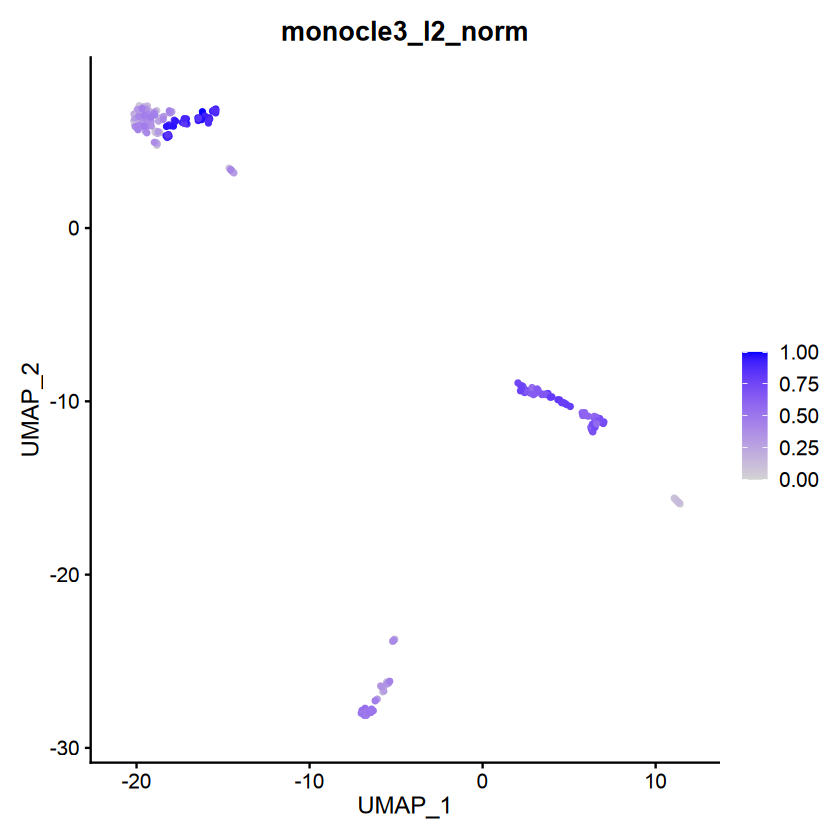

In [127]:
FeaturePlot(seurat_l2, features = c("monocle3_l2_norm"), reduction = "umap")

## TSCAN

In [128]:
library(TSCAN)

In [129]:
exp <- as.matrix(seurat_l2@assays$RNA@data)
procdata <- preprocess(exp, minexpr_value = 0, minexpr_percent = 0.001, cvcutoff = 0.01)


In [130]:
lpsmclust <- exprmclust(procdata)
tscan_order = TSCANorder(lpsmclust)

In [131]:
str(lpsmclust, 2)

List of 4
 $ pcareduceres: num [1:227, 1:4] 0.357 -9.416 -9.507 6.5 6.542 ...
  ..- attr(*, "dimnames")=List of 2
 $ MSTtree     :Class 'igraph'  hidden list of 10
  ..$ : num 7
  ..$ : logi FALSE
  ..$ : num [1:6] 3 6 5 4 6 5
  ..$ : num [1:6] 0 0 1 2 2 3
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ : NULL
  ..$ :List of 4
  ..$ :<environment: 0x55c89e019530> 
 $ clusterid   : Named int [1:227] 1 2 2 3 3 4 4 3 5 6 ...
  ..- attr(*, "names")= chr [1:227] "cell4" "cell6" "cell7" "cell8" ...
 $ clucenter   : num [1:7, 1:4] -0.924 -9.551 6.198 -6.837 6.857 ...


In [132]:
head(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell404,cell404,2,1
cell137,cell137,2,2
cell40,cell40,2,3
cell426,cell426,2,4
cell283,cell283,2,5
cell60,cell60,2,6


In [133]:
tail(tscan_order)

,sample_name,State,Pseudotime
,<chr>,<int>,<int>
cell350,cell350,5,222
cell370,cell370,5,223
cell61,cell61,5,224
cell327,cell327,5,225
cell362,cell362,5,226
cell452,cell452,5,227


In [134]:
tscan_order[rownames(seurat_l2@meta.data),"Pseudotime"]

[1] 112  23  20 185 174  59  58 153 209  50 188   8 217  72 162 220 139 213
 [19]   3  52 218  26 176  27  39  22  74   6 224  83  78 187 107  31  14  10
 [37] 118 111 132 161  96 212 142 200  61  56 175  38 158  45 120  65 108  68
 [55]  54 101  81 145   7  98  47  70 105 171   2   9 167 206 208 216  85  69
 [73]  97  62  32 205  48  18  94 219 157 170 160  46  86 122  84  19  88 199
 [91] 201  64 164  40 183 163 116 190 193 124 133  73  60  91  11 211 152 102
[109]  89 177 128  16 165 109 106 156  79 210 125  30 180 172  29  66  35  42
[127] 110 214 204 154  15 191  25  24  63 144  13 100  49 159 123 136   5  82
[145]  53 192 147 119 137  90 130  92 184 202 149 173 189  33 134  17 169 225
[163] 121 131  75 197 113 103 151  55 194 114 117  93  44 115 222 166 127 226
[181]  34  57  77 223  41 181 182  95  28  67 203 196 148  36  43  37 129  87
[199] 155  51   1 215 140 207 138 168 150 178   4 195 104 143 179 146 198  21
[217]  71  99  80  76 126 221 186  12 227 141 135

In [135]:
tscan_l2_rank = rank(tscan_order[rownames(seurat_l2@meta.data),"Pseudotime"], ties.method = 'random', na.last = 'keep')
tscan_l2_norm = scales::rescale(tscan_l2_rank,to = c(0,1))
seurat_l2@meta.data$tscan_l2_norm = tscan_l2_norm
seurat_l2@meta.data$tscan_l2 = tscan_order[rownames(seurat_l2@meta.data),"Pseudotime"]

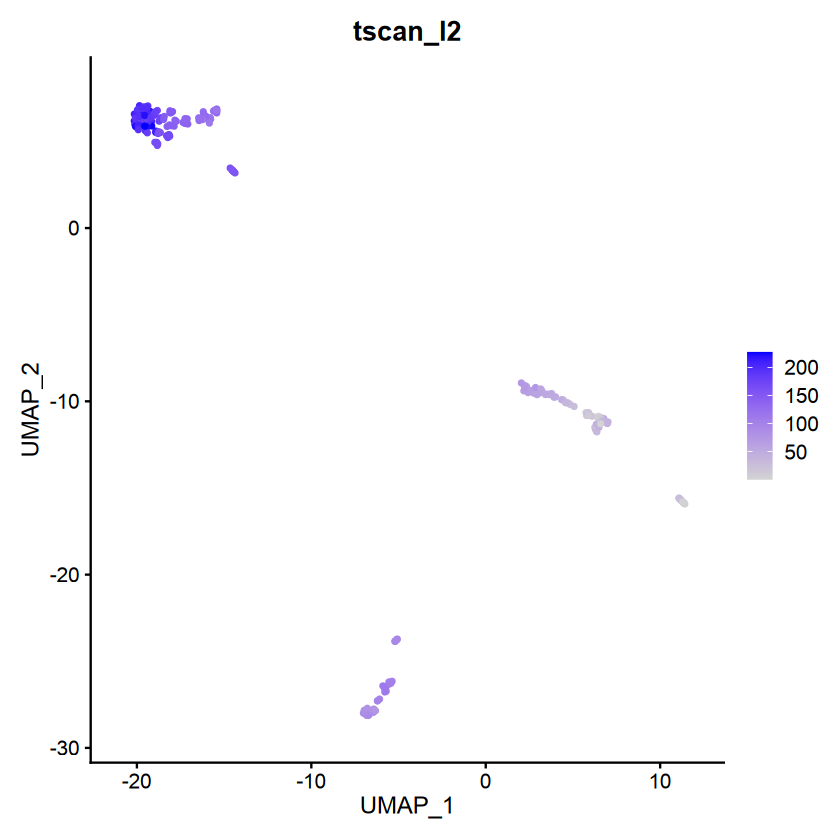

In [136]:
FeaturePlot(seurat_l2, features = c("tscan_l2"), reduction = "umap")

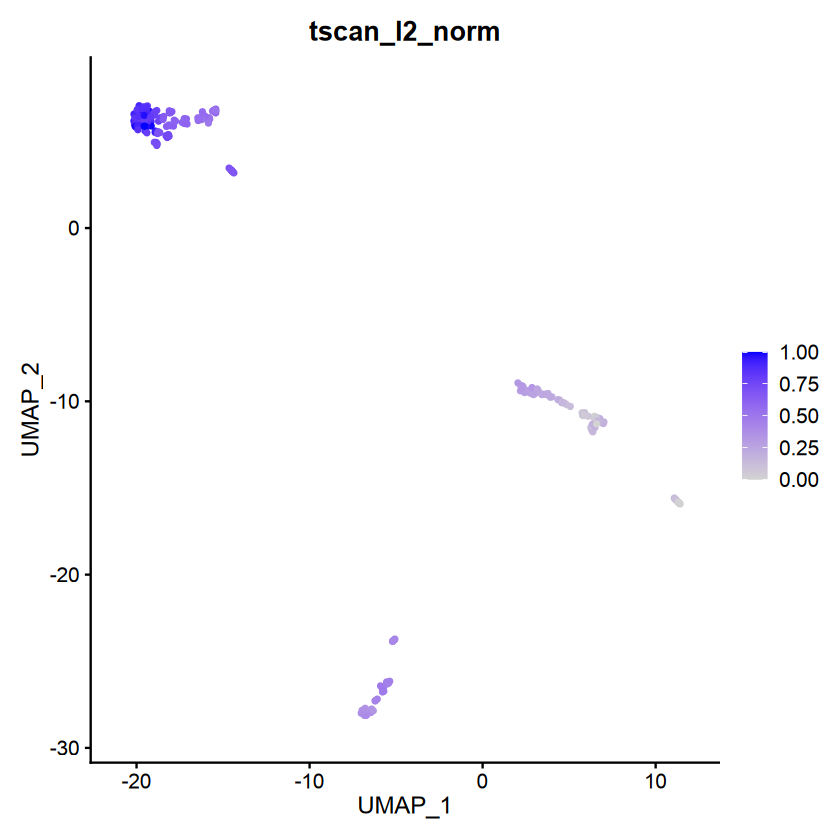

In [137]:
FeaturePlot(seurat_l2, features = c("tscan_l2_norm"), reduction = "umap")

## comparison

In [138]:
head(seurat_l2@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,⋯,monocle3_norm,monocle3,tscan_norm,tscan,dpt_l2_norm,dpt_l2,monocle3_l2_norm,monocle3_l2,tscan_l2_norm,tscan_l2
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell4,SeuratProject,683875,67,140.96162,D,0.000000000,-0.02347488,2,0.000000000,0.06888238,⋯,0.30022075,22.579956,0.7115903,265,0.48672566,198.27193,0.2477876,0.005723400,0.49115044,112
cell6,SeuratProject,495019,24,90.29625,D,0.001769912,0.82813316,2,0.001769912,0.13516030,⋯,0.14790287,7.284201,0.5417790,202,0.20353982,42.21042,0.7831858,16.774808708,0.09734513,23
cell7,SeuratProject,405505,22,30.30074,D,0.003539823,-0.38057924,2,0.003539823,0.11913058,⋯,0.08830022,5.498400,0.4932615,184,0.09292035,26.32742,0.5840708,14.261366152,0.08407080,20
cell8,SeuratProject,1006799,61,176.78494,D,0.005309735,0.38884501,2,0.005309735,0.03457583,⋯,0.75938190,Inf,0.8921833,332,0.72566372,253.29763,0.2389381,0.005474557,0.81415929,185
cell11,SeuratProject,828717,65,173.30976,D,-0.007079646,-0.85826894,2,0.007079646,0.15233305,⋯,0.78145695,Inf,0.8059299,300,0.66371681,247.99571,0.8805310,Inf,0.76548673,174
cell14,SeuratProject,610145,35,109.42021,D,-0.008849558,-0.73218080,2,0.008849558,0.14332709,⋯,0.16997792,7.405127,0.5768194,215,0.25221239,80.16418,0.6327434,15.757179959,0.25663717,59


In [139]:
seurat_l2@meta.data$dpt_l2_rank = rank(seurat_l2@meta.data$dpt, ties.method = 'random', na.last = 'keep')
seurat_l2@meta.data$dpt_l2_norm <- scales::rescale(seurat_l2@meta.data$dpt_l2_rank,to = c(0,1))


In [140]:
seurat_l2@meta.data$sim_time_l2_rank = rank(seurat_l2@meta.data$sim_time, ties.method = 'random', na.last = 'keep')
seurat_l2@meta.data$sim_time_l2_norm <- scales::rescale(seurat_l2@meta.data$sim_time_l2_rank,to = c(0,1))

In [141]:
long_df <- gather(seurat_l2@meta.data[,c("dpt_l2_norm", "monocle3_l2_norm", "sim_time_l2_norm", "Cell_Type", "lineage")], key = "variable", value = "value", -sim_time_l2_norm, -Cell_Type, -lineage)
colnames(long_df) = c('sim_time_l2_norm', 'Cell_Type', 'lineage', 'method', 'value')
long_df$method[long_df$method=='dpt_l2_norm'] = "DPT"
long_df$method[long_df$method=='monocle3_l2_norm'] = "monocle3"
long_df$method[long_df$method=='tscan_l2_norm'] = "TSCAN"
head(long_df)

,sim_time_l2_norm,Cell_Type,lineage,method,value
,<dbl>,<chr>,<int>,<chr>,<dbl>
1,0.3141593,D,2,DPT,0.3274336
2,0.2035398,D,2,DPT,0.7522124
3,0.1061947,D,2,DPT,0.7212389
4,0.6415929,D,2,DPT,0.7610619
5,0.6371681,D,2,DPT,0.9336283
6,0.2300885,D,2,DPT,0.4292035


In [142]:
cor.test(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$dpt_l2_norm, na.rm=T)$estimate
cor.test(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$monocle3_l2_norm, na.rm=T)$estimate
cor.test(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$tscan_l2_norm, na.rm=T)$estimate


cor 
-0.1421449

cor 
-0.2987162

cor 
0.9413453

In [143]:
correlations <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$dpt_l2_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$monocle3_l2_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l2@meta.data$sim_time_l2_norm, seurat_l2@meta.data$tscan_l2_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlations)

,method,correlation
,<chr>,<dbl>
1,DPT,0.1421449
2,monocle3,0.2987162
3,TSCAN,0.9413453


In [144]:
correlation_with_gt <- data.frame(
  method = c("DPT", "monocle3", "TSCAN"),
  correlation = c(abs(cor(seurat_l2@meta.data$r, seurat_l2@meta.data$dpt_l2_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l2@meta.data$r, seurat_l2@meta.data$monocle3_l2_norm, method = "spearman", use = "complete.obs")),
                  abs(cor(seurat_l2@meta.data$r, seurat_l2@meta.data$tscan_l2_norm, method = "spearman", use = "complete.obs"))
                 )
)
head(correlation_with_gt)

,method,correlation
,<chr>,<dbl>
1,DPT,0.003561983
2,monocle3,0.262454116
3,TSCAN,0.110139340


In [145]:
correlations_ = correlation_with_gt
correlations_$lineage = "lineage2"
all_correlation_with_gt = rbind(all_correlation_with_gt, correlations_)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.990000000,all
DPT,0.740000000,all
monocle3,0.320000000,all
TSCAN,0.700000000,all
DPT,0.058296721,lineage1
monocle3,0.001249054,lineage1
TSCAN,0.051375170,lineage1
DPT,0.003561983,lineage2
monocle3,0.262454116,lineage2


In [146]:
long_df <- left_join(long_df, correlations, by = "method")
head(long_df)

,sim_time_l2_norm,Cell_Type,lineage,method,value,correlation
,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,0.3141593,D,2,DPT,0.3274336,0.1421449
2,0.2035398,D,2,DPT,0.7522124,0.1421449
3,0.1061947,D,2,DPT,0.7212389,0.1421449
4,0.6415929,D,2,DPT,0.7610619,0.1421449
5,0.6371681,D,2,DPT,0.9336283,0.1421449
6,0.2300885,D,2,DPT,0.4292035,0.1421449


Saving 6.67 x 6.67 in image


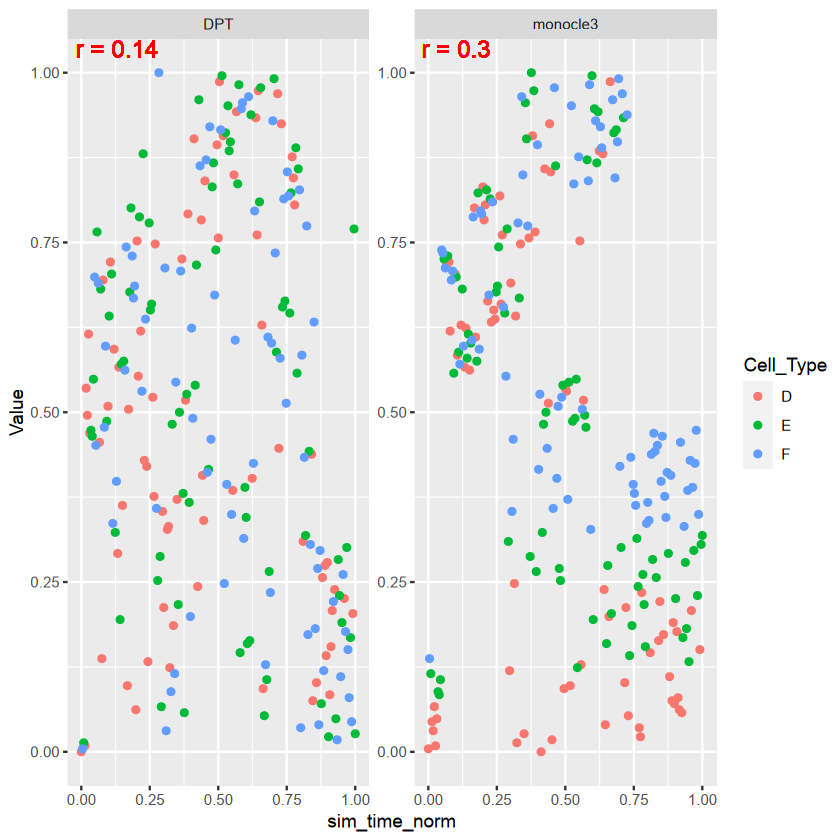

In [147]:
ggplot(long_df, aes(x = sim_time_l2_norm, y = value, color=Cell_Type, palette="Set1")) + 
  geom_point() + 
  facet_wrap(~method, scales = "free") +
  geom_text(aes(label = paste("r =", round(correlation, 2))), x = -Inf, y = Inf, hjust = -0.1, vjust = 1.1, color = "red", size = 5) +
  xlab("sim_time_norm") + 
  ylab("Value")
ggsave("Pseudotime_lineage1_comparison_cell_type.pdf")

# Output

## correlation with r(ground truth)

In [148]:
all_correlation_with_gt$correlation = round(all_correlation_with_gt$correlation, 2)
all_correlation_with_gt

method,correlation,lineage
<chr>,<dbl>,<chr>
ONTraC,0.99,all
DPT,0.74,all
monocle3,0.32,all
TSCAN,0.70,all
DPT,0.06,lineage1
monocle3,0.00,lineage1
TSCAN,0.05,lineage1
DPT,0.00,lineage2
monocle3,0.26,lineage2


In [149]:
write.csv(all_correlation_with_gt,'Spearman_correlation_with_truth_all_lineage.csv')

## pseudotime

In [150]:
head(ss0@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,RNA_snn_res.2,seurat_clusters,sim_time_rank,sim_time_norm,dpt_norm,dpt,monocle3_norm,monocle3,tscan_norm,tscan
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cell1,SeuratProject,388212,23,595.68285,A,-0.400000000,0.93397740,1,0.400000000,0.41038990,6,6,362,0.7969095,0.7064018,309373.07,0.5033113,33.282884,NA,NA
cell2,SeuratProject,464480,28,759.57758,A,0.400000000,-0.97018565,1,0.400000000,0.44172327,2,2,422,0.9293598,0.6754967,308107.51,0.4150110,29.413140,0.277628032,104
cell3,SeuratProject,508553,40,682.12469,A,-0.405309735,-0.82975244,1,0.405309735,0.49076736,3,3,390,0.8587196,0.7969095,311162.54,0.9580574,Inf,0.002695418,2
cell4,SeuratProject,683875,67,140.96162,D,0.000000000,-0.02347488,2,0.000000000,0.06888238,4,4,108,0.2362031,0.1633554,4420.94,0.3002208,22.579956,0.711590296,265
cell5,SeuratProject,495486,34,728.00217,A,0.405357143,-0.98190729,1,0.405357143,0.44803487,9,9,410,0.9028698,0.9933775,320219.13,0.7682119,Inf,0.159029650,60
cell6,SeuratProject,495019,24,90.29625,D,0.001769912,0.82813316,2,0.001769912,0.13516030,0,0,69,0.1501104,0.3752759,14263.14,0.1479029,7.284201,0.541778976,202


In [151]:
colnames(ss0@meta.data)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "sim_time"       
 [5] "Cell_Type"       "x"               "y"               "lineage"        
 [9] "r"               "Cell_NTScore"    "RNA_snn_res.2"   "seurat_clusters"
[13] "sim_time_rank"   "sim_time_norm"   "dpt_norm"        "dpt"            
[17] "monocle3_norm"   "monocle3"        "tscan_norm"      "tscan"

In [152]:
head(seurat_l1@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sim_time,Cell_Type,x,y,lineage,r,Cell_NTScore,⋯,tscan,dpt_l1_norm,dpt_l1,monocle3_l1_norm,monocle3_l1,tscan_l1_norm,tscan_l1,dpt_l1_rank,sim_time_l1_rank,sim_time_l1_norm
,<fct>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
cell1,SeuratProject,388212,23,595.6828,A,-0.4000000,0.93397740,1,0.4000000,0.4103899,⋯,NA,0.41150442,0.00000,0.32743363,24.45571,0.3554502,76,94,149,0.6548673
cell2,SeuratProject,464480,28,759.5776,A,0.4000000,-0.97018565,1,0.4000000,0.4417233,⋯,104,0.34955752,16.22265,0.50000000,28.98852,0.5213270,111,80,201,0.8849558
cell3,SeuratProject,508553,40,682.1247,A,-0.4053097,-0.82975244,1,0.4053097,0.4907674,⋯,2,0.59292035,29.59998,0.73451327,Inf,0.7298578,155,135,173,0.7610619
cell5,SeuratProject,495486,34,728.0022,A,0.4053571,-0.98190729,1,0.4053571,0.4480349,⋯,60,0.98672566,56.64338,0.90707965,Inf,0.7203791,153,224,191,0.8407080
cell9,SeuratProject,421233,29,398.5391,A,-0.4106195,-0.06026377,1,0.4106195,0.4965796,⋯,NA,0.79203540,19.14919,0.27433628,21.34201,0.1848341,40,180,106,0.4646018
cell10,SeuratProject,550101,31,258.8223,A,0.4107143,0.57497716,1,0.4107143,0.4685184,⋯,NA,0.01327434,49.53684,0.03539823,14.72148,0.0000000,1,4,70,0.3053097


In [153]:
pseudotime_output = ss0@meta.data[,c('x', 'y', 'r', 'lineage', 'Cell_NTScore', 'dpt', 'monocle3','tscan','dpt_norm', 'monocle3_norm','tscan_norm')]
head(pseudotime_output)


,x,y,r,lineage,Cell_NTScore,dpt,monocle3,tscan,dpt_norm,monocle3_norm,tscan_norm
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,-0.400000000,0.93397740,0.400000000,1,0.41038990,309373.07,33.282884,NA,0.7064018,0.5033113,NA
cell2,0.400000000,-0.97018565,0.400000000,1,0.44172327,308107.51,29.413140,104,0.6754967,0.4150110,0.277628032
cell3,-0.405309735,-0.82975244,0.405309735,1,0.49076736,311162.54,Inf,2,0.7969095,0.9580574,0.002695418
cell4,0.000000000,-0.02347488,0.000000000,2,0.06888238,4420.94,22.579956,265,0.1633554,0.3002208,0.711590296
cell5,0.405357143,-0.98190729,0.405357143,1,0.44803487,320219.13,Inf,60,0.9933775,0.7682119,0.159029650
cell6,0.001769912,0.82813316,0.001769912,2,0.13516030,14263.14,7.284201,202,0.3752759,0.1479029,0.541778976


In [154]:
pseudotime_output$dpt_l1 = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('dpt_l1')]
pseudotime_output$monocle3_l1 = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('monocle3_l1')]
pseudotime_output$tscan_l1 = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('tscan_l1')]
pseudotime_output$dpt_l1_norm = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('dpt_l1_norm')]
pseudotime_output$monocle3_l1_norm = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('monocle3_l1_norm')]
pseudotime_output$tscan_l1_norm = seurat_l1@meta.data[match(rownames(pseudotime_output), rownames(seurat_l1@meta.data)), c('tscan_l1_norm')]


In [155]:
pseudotime_output$dpt_l2 = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('dpt_l2')]
pseudotime_output$monocle3_l2 = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('monocle3_l2')]
pseudotime_output$tscan_l2 = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('tscan_l2')]
pseudotime_output$dpt_l2_norm = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('dpt_l2_norm')]
pseudotime_output$monocle3_l2_norm = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('monocle3_l2_norm')]
pseudotime_output$tscan_l2_norm = seurat_l2@meta.data[match(rownames(pseudotime_output), rownames(seurat_l2@meta.data)), c('tscan_l2_norm')]


In [156]:
head(pseudotime_output)

,x,y,r,lineage,Cell_NTScore,dpt,monocle3,tscan,dpt_norm,monocle3_norm,⋯,tscan_l1,dpt_l1_norm,monocle3_l1_norm,tscan_l1_norm,dpt_l2,monocle3_l2,tscan_l2,dpt_l2_norm,monocle3_l2_norm,tscan_l2_norm
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,-0.400000000,0.93397740,0.400000000,1,0.41038990,309373.07,33.282884,NA,0.7064018,0.5033113,⋯,76,0.4115044,0.3274336,0.3554502,NA,NA,NA,NA,NA,NA
cell2,0.400000000,-0.97018565,0.400000000,1,0.44172327,308107.51,29.413140,104,0.6754967,0.4150110,⋯,111,0.3495575,0.5000000,0.5213270,NA,NA,NA,NA,NA,NA
cell3,-0.405309735,-0.82975244,0.405309735,1,0.49076736,311162.54,Inf,2,0.7969095,0.9580574,⋯,155,0.5929204,0.7345133,0.7298578,NA,NA,NA,NA,NA,NA
cell4,0.000000000,-0.02347488,0.000000000,2,0.06888238,4420.94,22.579956,265,0.1633554,0.3002208,⋯,NA,NA,NA,NA,198.27193,0.0057234,112,0.3274336,0.2477876,0.49115044
cell5,0.405357143,-0.98190729,0.405357143,1,0.44803487,320219.13,Inf,60,0.9933775,0.7682119,⋯,153,0.9867257,0.9070796,0.7203791,NA,NA,NA,NA,NA,NA
cell6,0.001769912,0.82813316,0.001769912,2,0.13516030,14263.14,7.284201,202,0.3752759,0.1479029,⋯,NA,NA,NA,NA,42.21042,16.7748087,23,0.7522124,0.7831858,0.09734513


In [157]:
colnames(pseudotime_output) = c('x', 'y', 'r', 'lineage', 'ONTraC',
                                'DPT', 'monocle3', 'TSCAN',
                                'DPT_norm', 'monocle3_norm', 'TSCAN_norm',
                                'DPT_l1', 'monocle3_l1', 'TSCAN_l1',
                                'DPT_l1_norm', 'monocle3_l1_norm', 'TSCAN_l1_norm',
                                'DPT_l2', 'monocle3_l2', 'TSCAN_l2',
                                'DPT_l2_norm', 'monocle3_l2_norm', 'TSCAN_l2_norm')
head(pseudotime_output)


,x,y,r,lineage,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,⋯,TSCAN_l1,DPT_l1_norm,monocle3_l1_norm,TSCAN_l1_norm,DPT_l2,monocle3_l2,TSCAN_l2,DPT_l2_norm,monocle3_l2_norm,TSCAN_l2_norm
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
cell1,-0.400000000,0.93397740,0.400000000,1,0.41038990,309373.07,33.282884,NA,0.7064018,0.5033113,⋯,76,0.4115044,0.3274336,0.3554502,NA,NA,NA,NA,NA,NA
cell2,0.400000000,-0.97018565,0.400000000,1,0.44172327,308107.51,29.413140,104,0.6754967,0.4150110,⋯,111,0.3495575,0.5000000,0.5213270,NA,NA,NA,NA,NA,NA
cell3,-0.405309735,-0.82975244,0.405309735,1,0.49076736,311162.54,Inf,2,0.7969095,0.9580574,⋯,155,0.5929204,0.7345133,0.7298578,NA,NA,NA,NA,NA,NA
cell4,0.000000000,-0.02347488,0.000000000,2,0.06888238,4420.94,22.579956,265,0.1633554,0.3002208,⋯,NA,NA,NA,NA,198.27193,0.0057234,112,0.3274336,0.2477876,0.49115044
cell5,0.405357143,-0.98190729,0.405357143,1,0.44803487,320219.13,Inf,60,0.9933775,0.7682119,⋯,153,0.9867257,0.9070796,0.7203791,NA,NA,NA,NA,NA,NA
cell6,0.001769912,0.82813316,0.001769912,2,0.13516030,14263.14,7.284201,202,0.3752759,0.1479029,⋯,NA,NA,NA,NA,42.21042,16.7748087,23,0.7522124,0.7831858,0.09734513


In [158]:
write.csv(pseudotime_output, "pseudotime_output.csv")

# sessionInfo

In [159]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 9.4 (Blue Onyx)

Matrix products: default
BLAS/LAPACK: /sc/arion/work/wangw32/conda-env/envs/seurat_v4/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.utf8        LC_NUMERIC=C              
 [3] LC_TIME=en_US.utf-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=en_US.utf-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=en_US.utf-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.utf-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] mclust_6.1                  slingshot_2.10.0           
 [3] TrajectoryUtils_1.10.1      princurve_2.1.6            
 [5] uwot_0.1.16                 Matrix_1.6-4               
 [7